# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, cohen_kappa_score, accuracy_score, r2_score, mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPRegressor

# EDA + Preprocessing

In [2]:
df = pd.read_csv("data.csv")
df.head()

,Date,HomeTeam,AwayTeam,Elo_H_before,Elo_A_before,GoalsScore_H,GoalsAgainst_H,GoalDifference_H,WinStreak_H,LoseStreak_H,...,WinRate_A,GoalsScore_A_avg,GoalsAgainst_A_avg,H2H_score,H2H_GS_H_total,H2H_GS_A_total,H2H_GS_H_avg,H2H_GS_A_avg,Full Time Home Goals,Full Time Away Goals
0,2004-08-14,Aston Villa,Southampton,1500.0,1500.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0,0,0,0.0,0.0,2,0
1,2004-08-14,Blackburn,West Brom,1500.0,1500.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0,0,0,0.0,0.0,1,1
2,2004-08-14,Bolton,Charlton,1500.0,1500.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0,0,0,0.0,0.0,4,1
3,2004-08-14,Man City,Fulham,1500.0,1500.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0,0,0,0.0,0.0,1,1
4,2004-08-14,Middlesbrough,Newcastle,1500.0,1500.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0,0,0,0.0,0.0,2,2


In [3]:
df.describe()

,Elo_H_before,Elo_A_before,GoalsScore_H,GoalsAgainst_H,GoalDifference_H,WinStreak_H,LoseStreak_H,Wins_H,Losses_H,WinRate_H,...,WinRate_A,GoalsScore_A_avg,GoalsAgainst_A_avg,H2H_score,H2H_GS_H_total,H2H_GS_A_total,H2H_GS_H_avg,H2H_GS_A_avg,Full Time Home Goals,Full Time Away Goals
count,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,...,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000
mean,1548.411892,1549.286322,6.709023,6.846742,-0.137719,0.611153,0.714160,1.839975,1.905514,0.369179,...,0.385915,1.381044,1.341955,-0.068797,12.619674,12.775313,1.171940,1.226657,1.541729,1.192607
std,95.445156,95.418382,3.318124,3.122907,5.040451,1.125222,1.080365,1.245352,1.222710,0.249508,...,0.249020,0.666302,0.617865,4.889136,14.077163,14.065564,0.744148,0.782429,1.314124,1.166165
min,1351.487658,1347.664214,0.000000,0.000000,-18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1480.479696,1481.322476,4.000000,5.000000,-4.000000,0.000000,0.000000,1.000000,1.000000,0.200000,...,0.200000,1.000000,1.000000,-2.000000,2.000000,3.000000,0.722222,0.764706,1.000000,0.000000
50%,1519.007062,1519.733075,6.000000,7.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.400000,...,0.400000,1.200000,1.200000,0.000000,8.000000,8.000000,1.125000,1.166667,1.000000,1.000000
75%,1613.564688,1614.476271,9.000000,9.000000,3.000000,1.000000,1.000000,3.000000,3.000000,0.600000,...,0.600000,1.800000,1.800000,2.000000,18.000000,18.000000,1.631579,1.666667,2.000000,2.000000
max,1847.302913,1844.700563,29.000000,20.000000,29.000000,5.000000,5.000000,5.000000,5.000000,1.000000,...,1.000000,4.800000,4.600000,24.000000,93.000000,92.000000,5.500000,6.000000,9.000000,9.000000


In [4]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

start_date = pd.Timestamp("2004-08-14")
end_date = pd.Timestamp("2005-05-15")

# Drop mùa đầu tiên
df = df[~((df["Date"] >= start_date) & (df["Date"] <= end_date))].reset_index(drop=True)

C:\Users\phong\AppData\Local\Temp\ipykernel_57980\1591876597.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)


In [5]:
df_overview = []
columns = df.columns
for i in columns: 
    types = df[i].dtypes
    unique_data = df[i].nunique()
                   
    missing_count=df[i].isnull().sum() 
    value_count= df[i].isnull().count() 
    missing_percentage= round(missing_count/value_count*100,2)
        
    duplicated= df.duplicated().sum()    
    df_overview.append([i, types, unique_data, missing_count, missing_percentage, duplicated])
        
df_info = pd.DataFrame(df_overview)
df_info.columns =["name of column", "types", "unique_data", "missing value", "missing percentage", "duplicated"]

df_info

,name of column,types,unique_data,missing value,missing percentage,duplicated
0,Date,datetime64[ns],2139,0,0.0,0
1,HomeTeam,object,44,0,0.0,0
2,AwayTeam,object,44,0,0.0,0
3,Elo_H_before,float64,7587,0,0.0,0
4,Elo_A_before,float64,7591,0,0.0,0
5,GoalsScore_H,float64,26,0,0.0,0
6,GoalsAgainst_H,float64,21,0,0.0,0
7,GoalDifference_H,float64,41,0,0.0,0
8,WinStreak_H,int64,6,0,0.0,0
9,LoseStreak_H,int64,6,0,0.0,0


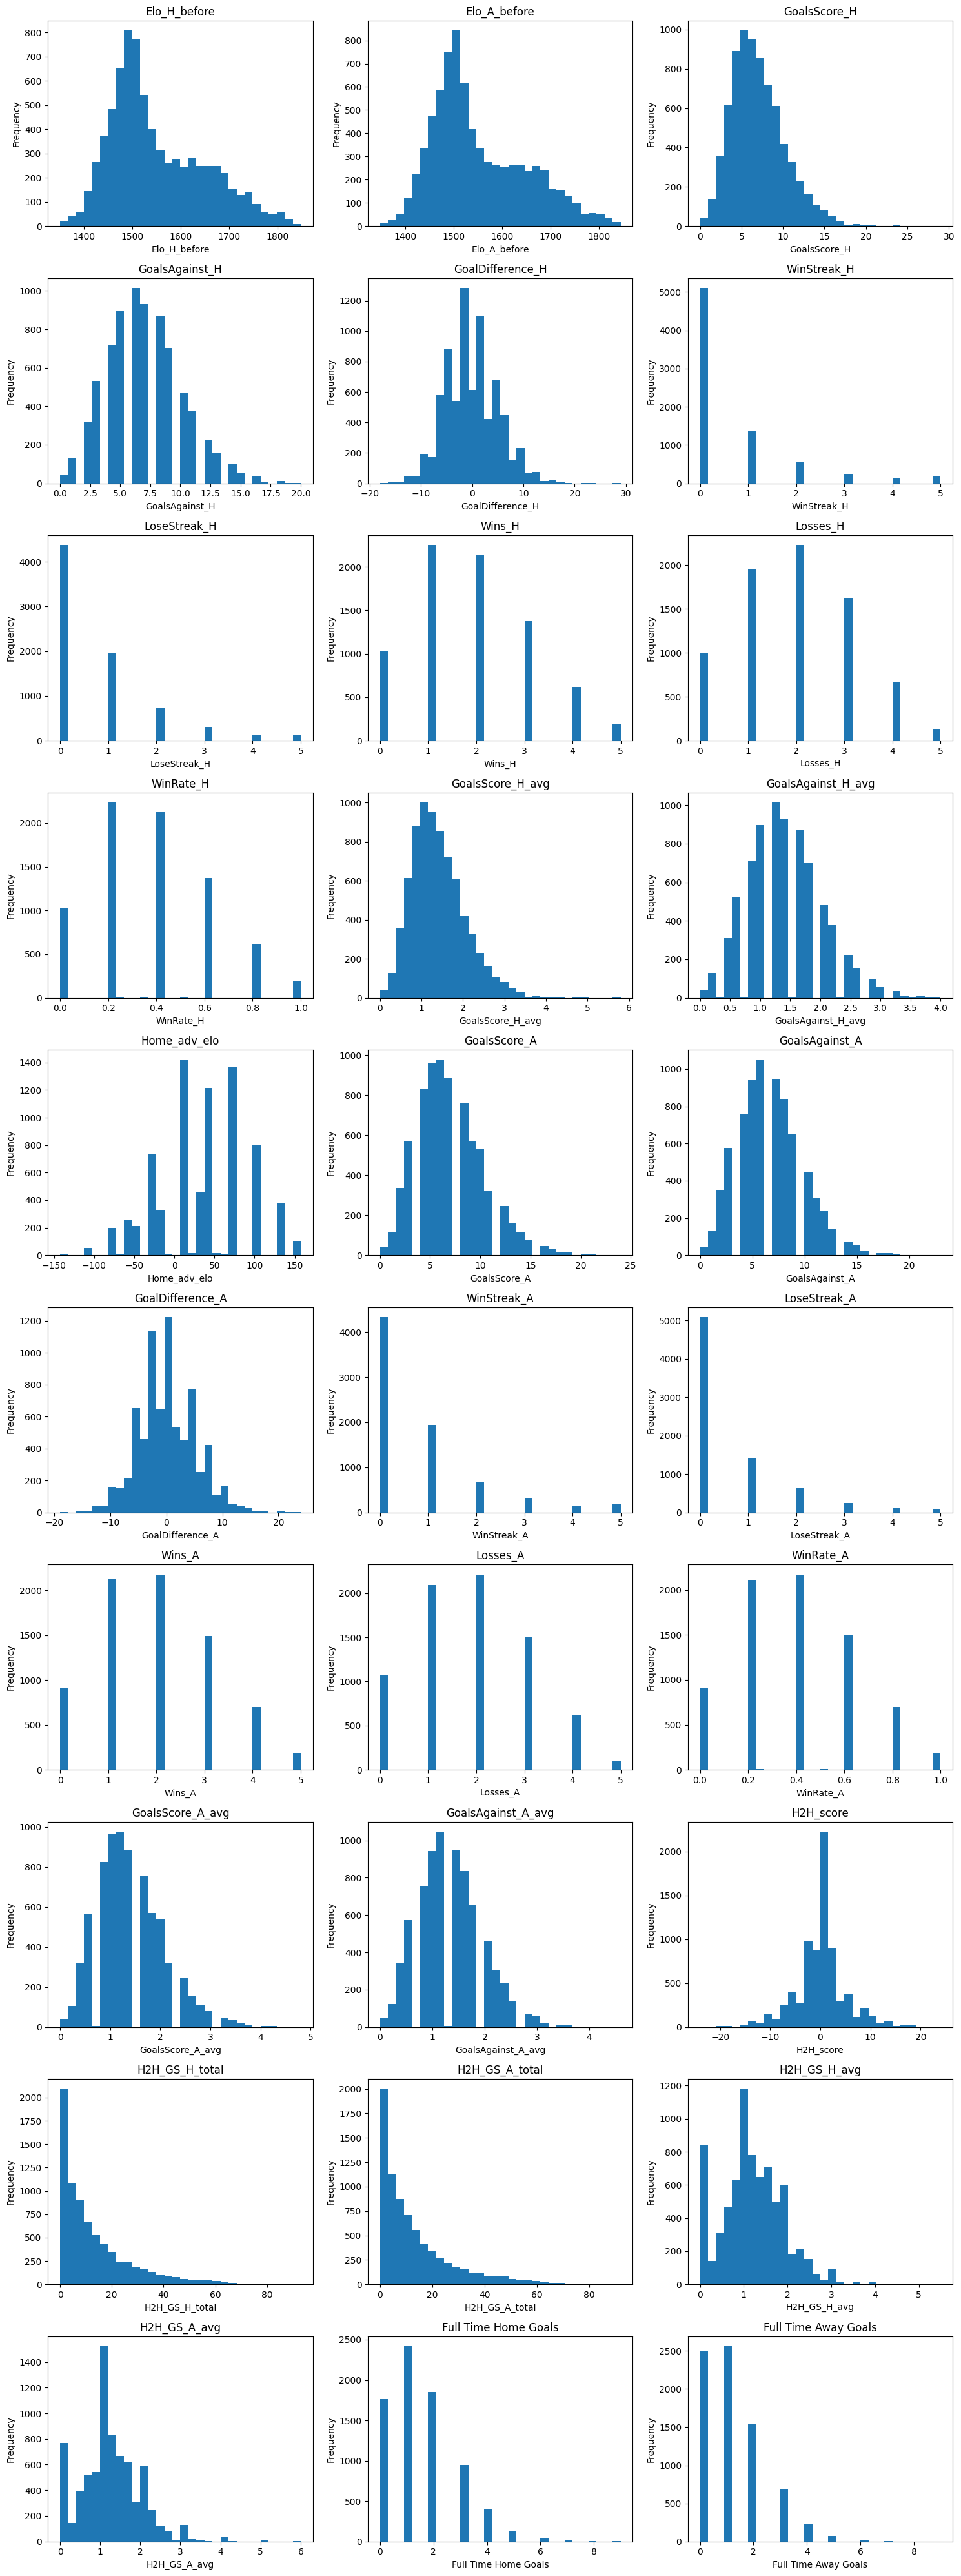

In [6]:
# Hiển thị phân phối của các cột numerical
num_columns = df.select_dtypes(include=["int64", "float64"]).columns
n = len(num_columns)

cols = 3 
rows = int(np.ceil(n / cols))

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(num_columns):
    axes[i].hist(df[col], bins=30)
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [7]:
def feature_engineering(df):
    df["Elo_diff"] = df["Elo_H_before"] - df["Elo_A_before"]
    df["Elo_ratio"] = df["Elo_H_before"] / df["Elo_A_before"]

    df["Goals_likelyhood_H"] = df["GoalsScore_H_avg"] + df["GoalsAgainst_A_avg"]
    df["Goals_likelyhood_A"] = df["GoalsScore_A_avg"] + df["GoalsAgainst_H_avg"]

    df["Home_adv_elo_sum"] = df["Elo_H_before"] + df["Home_adv_elo"]

    df["Full Time Home Goals"] = df.pop("Full Time Home Goals")
    df["Full Time Away Goals"] = df.pop("Full Time Away Goals")

    return df

df = feature_engineering(df)

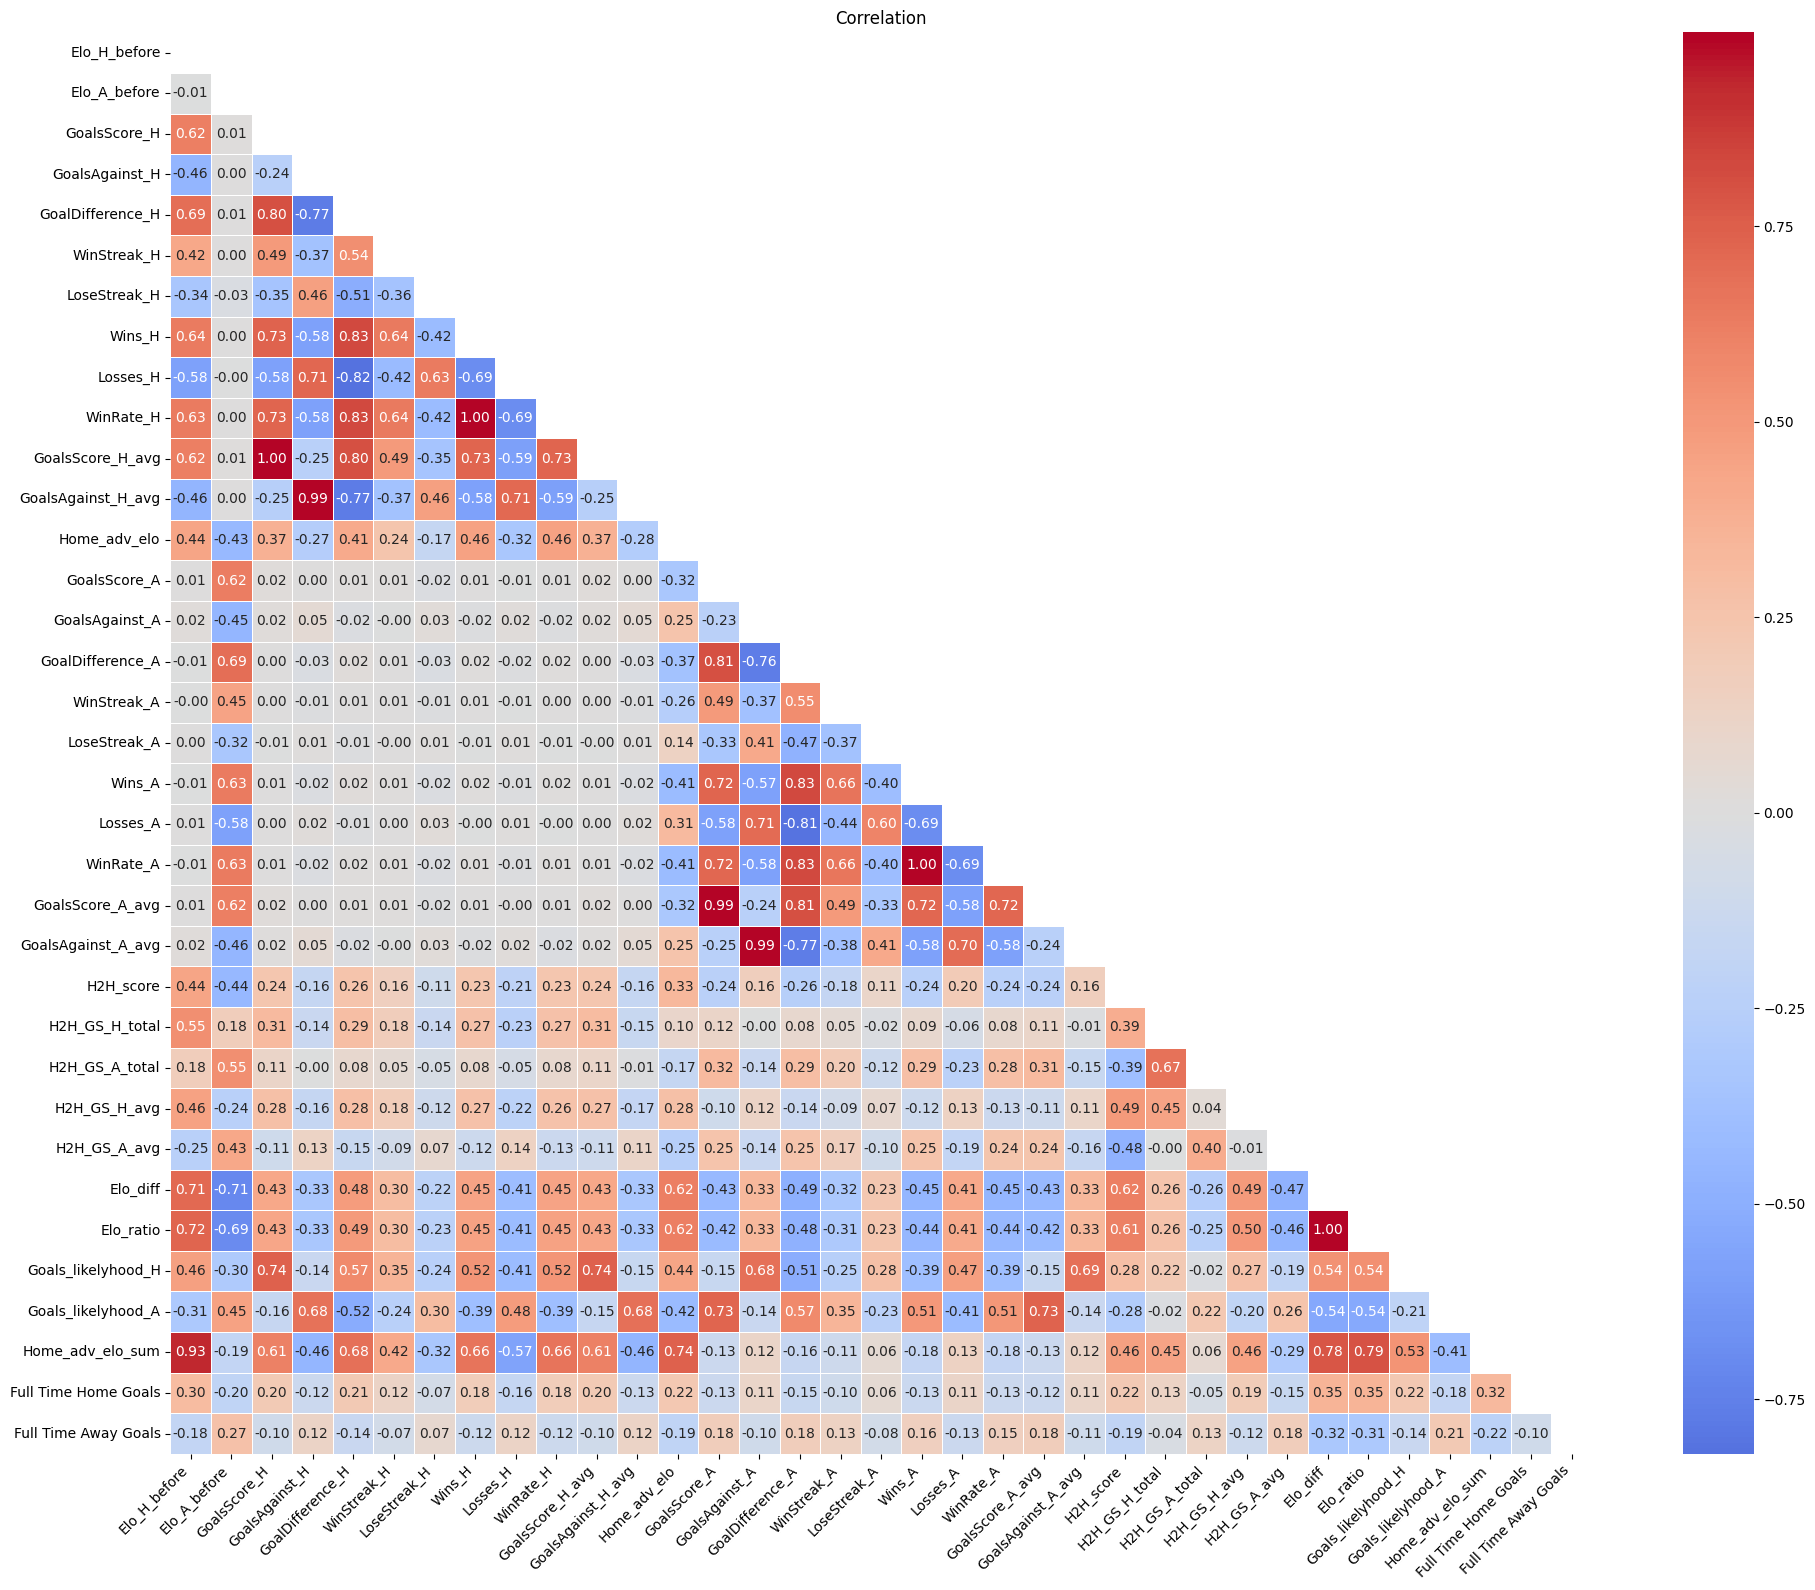

In [8]:
corr = df.corr(numeric_only=True)
thr = 0.0

mask_thr = (np.abs(corr) <= thr)
mask_upper = np.triu(np.ones_like(corr, dtype=bool), k=0)
mask = mask_thr | mask_upper

plt.figure(figsize=(20, 16))
ax = sns.heatmap(
    corr, mask=mask, annot=True, fmt=".2f",
    cmap="coolwarm", center=0, square=True, linewidths=0.5
)

plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.title(f"Correlation")
plt.tight_layout()
#plt.savefig("correlation_heatmap_base.png", dpi=300, bbox_inches="tight")
plt.show()

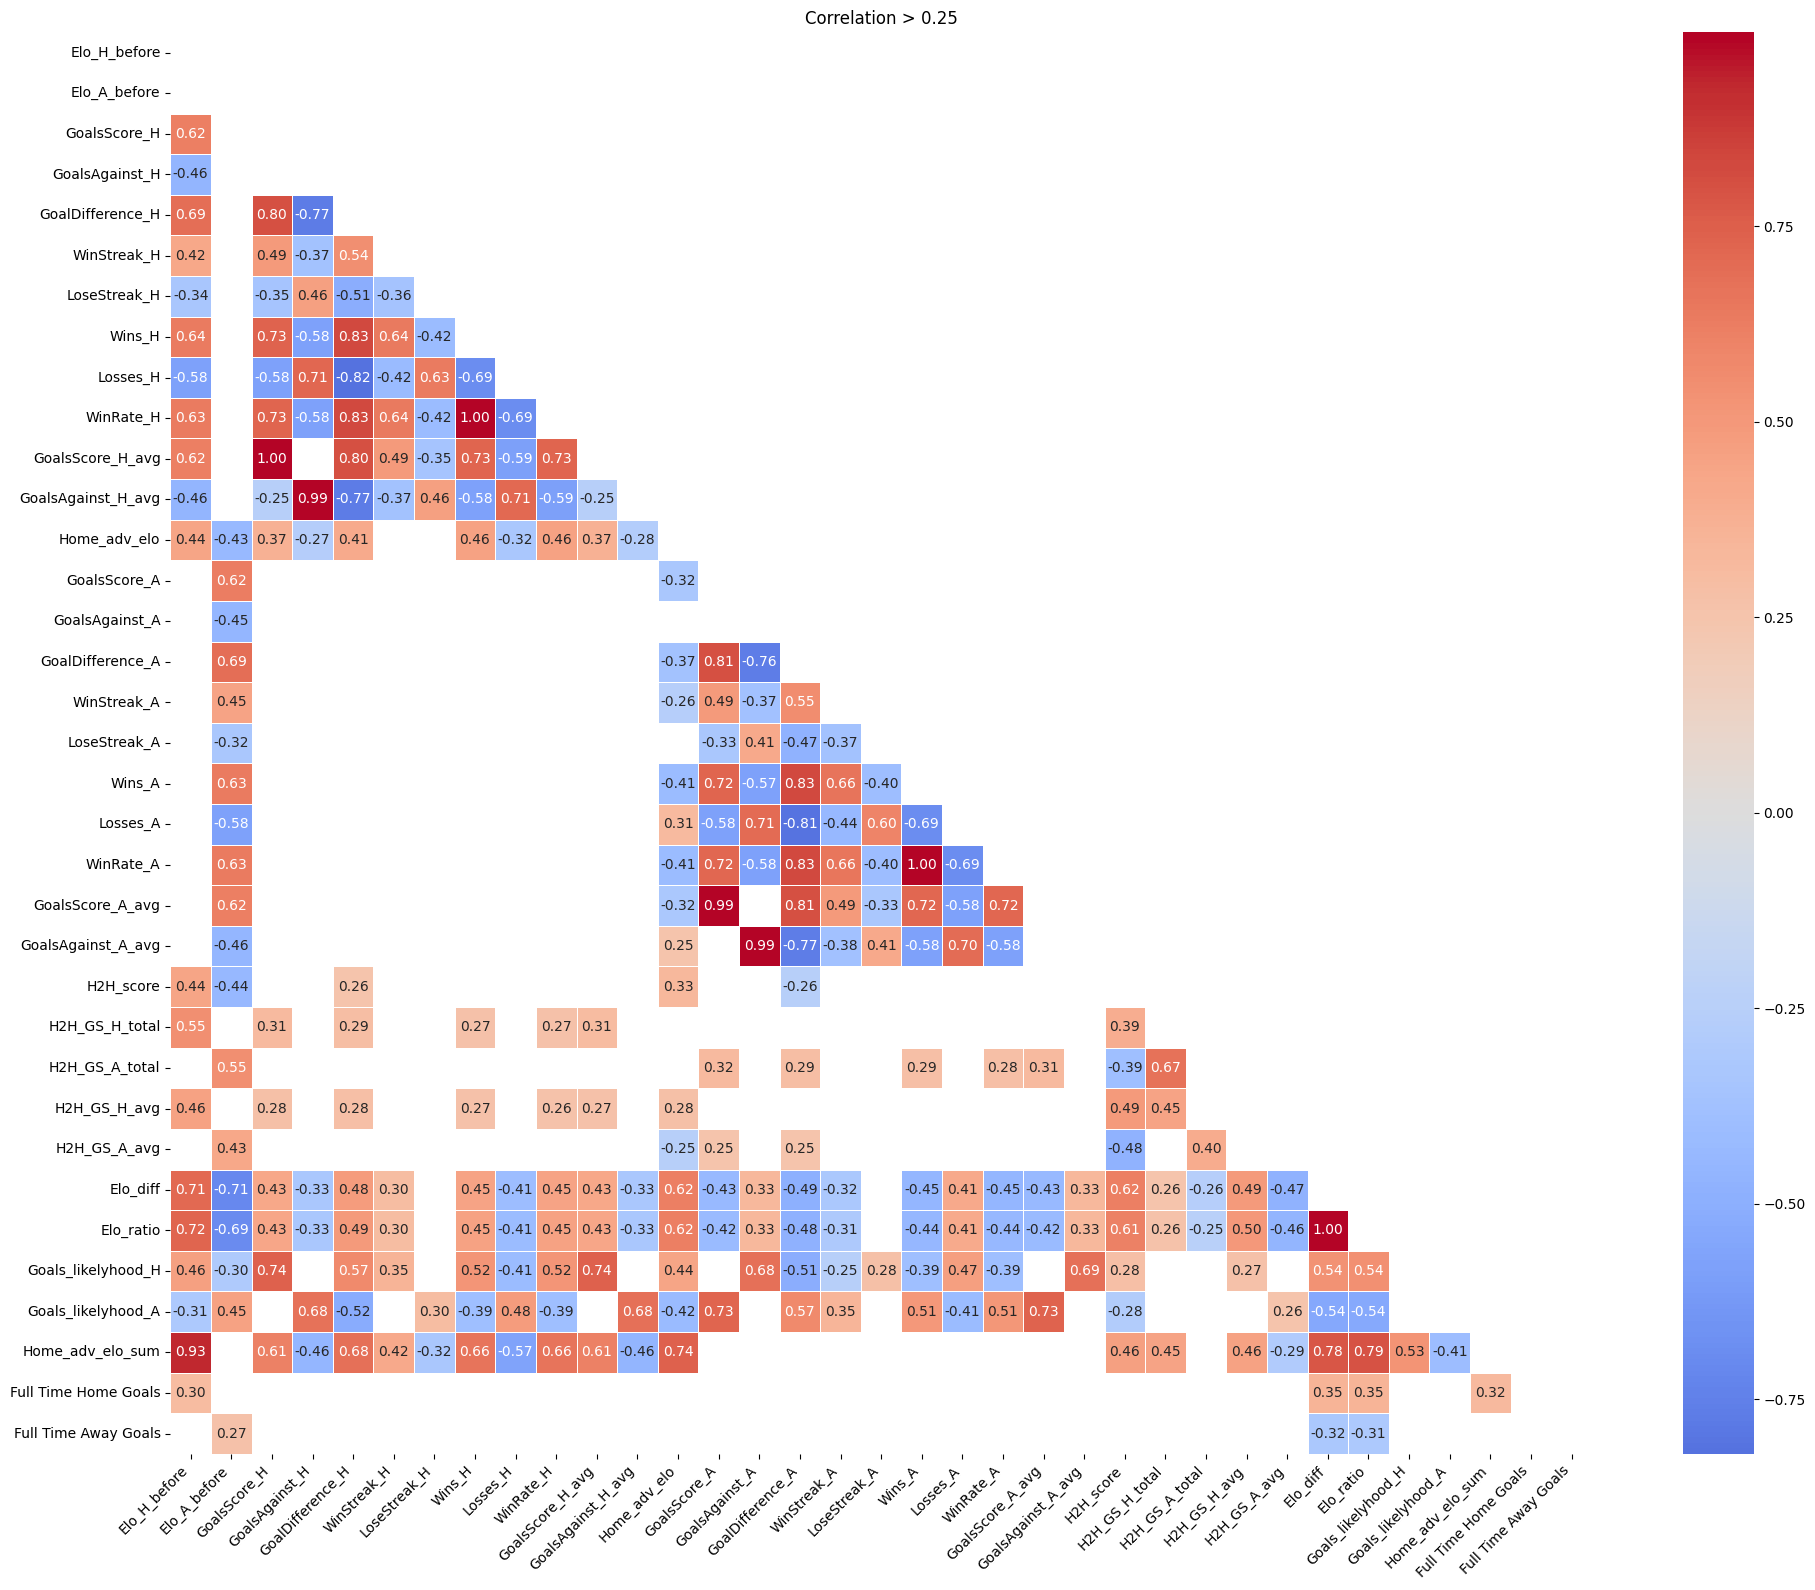

In [9]:
corr = df.corr(numeric_only=True)
thr = 0.25

mask_thr = (np.abs(corr) <= thr)
mask_upper = np.triu(np.ones_like(corr, dtype=bool), k=0)
mask = mask_thr | mask_upper

plt.figure(figsize=(20, 16))
ax = sns.heatmap(
    corr, mask=mask, annot=True, fmt=".2f",
    cmap="coolwarm", center=0, square=True, linewidths=0.5
)

plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.title(f"Correlation > {thr}")
plt.tight_layout()
#plt.savefig(f"correlation_heatmap_min_{thr}.png", dpi=300, bbox_inches="tight")
plt.show()

In [10]:
# Lọc để lấy các features có corr >= ngưỡng threshold
thr = 0
corr_home = corr["Full Time Home Goals"].abs()
corr_away = corr["Full Time Away Goals"].abs()

keep_num_features = corr_home[corr_home >= thr].index.union(
    corr_away[corr_away >= thr].index
)

# Lấy các cột object
object_cols = df.select_dtypes(include=["object", "datetime64[ns]"]).columns
keep_features = keep_num_features.union(object_cols)

# Lọc dataframe
df_filtered = df[keep_features]

In [11]:
exclude = ["Full Time Home Goals", "Full Time Away Goals"]

cols_to_norm = df_filtered.select_dtypes(include=['int64', 'float64']).columns.difference(exclude)

scaler = StandardScaler()
df_filtered[cols_to_norm] = scaler.fit_transform(df_filtered[cols_to_norm])

In [12]:
team_cols = ["HomeTeam", "AwayTeam"]

le = LabelEncoder()
all_teams = pd.concat([df_filtered[column] for column in team_cols]).unique()
le.fit(all_teams)
for col in team_cols:
    df_filtered[col + "_code"] = le.transform(df_filtered[col])

In [13]:

df_filtered["Full Time Home Goals"] = df_filtered.pop("Full Time Home Goals")
df_filtered["Full Time Away Goals"] = df_filtered.pop("Full Time Away Goals")

In [14]:
df_filtered.head()

,AwayTeam,Date,Elo_A_before,Elo_H_before,Elo_diff,Elo_ratio,GoalDifference_A,GoalDifference_H,GoalsAgainst_A,GoalsAgainst_A_avg,...,WinRate_A,WinRate_H,WinStreak_A,WinStreak_H,Wins_A,Wins_H,HomeTeam_code,AwayTeam_code,Full Time Home Goals,Full Time Away Goals
0,Liverpool,2005-08-13,-0.413155,-0.367033,0.032397,-0.009799,-0.239441,1.012189,0.094925,0.084990,...,0.050968,0.116152,0.212082,-0.544408,0.055248,0.118730,26,22,0,0
1,Blackburn,2005-08-13,-0.662075,-0.525322,0.096157,0.058017,-0.636983,0.027242,-0.231367,-0.240385,...,-1.558261,-1.491289,-0.656825,-0.544408,-1.556585,-1.489734,41,3,3,1
2,Charlton,2005-08-13,-1.051095,-0.525322,0.369953,0.357332,-1.233295,0.027242,0.421218,0.410365,...,-1.558261,-1.491289,-0.656825,-0.544408,-1.556585,-1.489734,36,11,1,3
3,Tottenham,2005-08-13,-0.485207,-1.036285,-0.388036,-0.448928,0.356872,-0.366738,-0.883952,-0.891136,...,-0.753646,-0.687569,-0.656825,-0.544408,-0.750669,-0.685502,30,38,0,2
4,Man United,2005-08-13,0.338894,-0.556960,-0.630609,-0.668863,0.754414,-1.548675,-0.231367,-0.240385,...,0.855582,-0.687569,0.212082,-0.544408,0.861164,-0.685502,15,25,0,2


In [15]:
X = df_filtered.drop(columns=["HomeTeam", "AwayTeam", "Full Time Home Goals", "Full Time Away Goals"])
y_home = df_filtered["Full Time Home Goals"]
y_away = df_filtered["Full Time Away Goals"]

In [16]:
# Tạo Train, Valid, Test theo mùa
test_start  = pd.Timestamp("2024-08-16")
valid_start = pd.Timestamp("2023-08-11")
valid_end   = test_start 

mask_test  = df_filtered["Date"] >= test_start
mask_valid = (df_filtered["Date"] >= valid_start) & (df_filtered["Date"] < valid_end)
mask_train = ~(mask_test | mask_valid)

X_train = X.loc[mask_train]
X_valid = X.loc[mask_valid]
X_test = X.loc[mask_test]

y_home_train = y_home.loc[mask_train]
y_home_valid = y_home.loc[mask_valid]
y_home_test = y_home.loc[mask_test]

y_away_train = y_away.loc[mask_train]
y_away_valid = y_away.loc[mask_valid]
y_away_test = y_away.loc[mask_test]

X_train = X_train.drop(columns=["Date"])
X_valid = X_valid.drop(columns=["Date"])
X_test = X_test.drop(columns=["Date"])

print(X_train.shape, X_valid.shape, X_test.shape)
print(y_home_train.shape, y_home_valid.shape, y_home_test.shape)
print(y_away_train.shape, y_away_valid.shape, y_away_test.shape)

(6840, 35) (380, 35) (380, 35)
(6840,) (380,) (380,)
(6840,) (380,) (380,)


# Models

In [17]:
results_df = pd.DataFrame(columns=[
    'model', 'rmse_home_test', 'rmse_away_test',
    'qwk_home_test', 'qwk_away_test', 'acc_test'
])

def add_model_results_to_df(df, model_name, rmse_home_test, rmse_away_test, qwk_home_test, qwk_away_test, acc_test):
    new_row = {
        'model': model_name,
        'rmse_home_test': rmse_home_test,
        'rmse_away_test': rmse_away_test,
        'qwk_home_test': qwk_home_test,
        'qwk_away_test': qwk_away_test,
        'acc_test': acc_test
    }
    return pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

## MLP

In [18]:
# Khai báo biến cho mô hình MLP
x_train_mlp = X_train.copy()
y_home_train_mlp = y_home_train.copy()
y_away_train_mlp = y_away_train.copy()

x_valid_mlp = X_valid.copy()
y_home_valid_mlp = y_home_valid.copy()
y_away_valid_mlp = y_away_valid.copy()

x_test_mlp = X_test.copy()
y_home_test_mlp = y_home_test.copy()
y_away_test_mlp = y_away_test.copy()

In [19]:
df_overview = []
columns = x_train_mlp.columns
for i in columns: 
    types = df_filtered[i].dtypes
    unique_data = df_filtered[i].nunique()
                   
    missing_count=df_filtered[i].isnull().sum() 
    value_count= df_filtered[i].isnull().count() 
    missing_percentage= round(missing_count/value_count*100,2)
        
    duplicated= df_filtered.duplicated().sum()    
    df_overview.append([i, types, unique_data, missing_count, missing_percentage, duplicated])
        
df_info = pd.DataFrame(df_overview)
df_info.columns =["name of column", "types", "unique_data", "missing value", "missing percentage", "duplicated"]

df_info

,name of column,types,unique_data,missing value,missing percentage,duplicated
0,Elo_A_before,float64,7591,0,0.0,0
1,Elo_H_before,float64,7587,0,0.0,0
2,Elo_diff,float64,7600,0,0.0,0
3,Elo_ratio,float64,7600,0,0.0,0
4,GoalDifference_A,float64,40,0,0.0,0
5,GoalDifference_H,float64,41,0,0.0,0
6,GoalsAgainst_A,float64,22,0,0.0,0
7,GoalsAgainst_A_avg,float64,35,0,0.0,0
8,GoalsAgainst_H,float64,21,0,0.0,0
9,GoalsAgainst_H_avg,float64,31,0,0.0,0


In [20]:
mlp_home = MLPRegressor(
    hidden_layer_sizes=(256, 128, 64, 32),
    activation='relu',
    solver='adam',
    learning_rate_init=1e-3,
    max_iter=2000,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)

mlp_away = MLPRegressor(
    hidden_layer_sizes=(256, 128, 64, 32),
    activation='relu',
    solver='adam',
    learning_rate_init=1e-3,
    max_iter=2000,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)

mlp_home.fit(x_train_mlp, y_home_train_mlp)
mlp_away.fit(x_train_mlp, y_away_train_mlp)

,loss,'squared_error'
,hidden_layer_sizes,"(256, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,2000
,shuffle,True


In [21]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_home_train = rmse(y_home_train_mlp, mlp_home.predict(x_train_mlp))
rmse_home_valid = rmse(y_home_valid_mlp, mlp_home.predict(x_valid_mlp))
rmse_home_test  = rmse(y_home_test_mlp,  mlp_home.predict(x_test_mlp))

rmse_away_train = rmse(y_away_train_mlp, mlp_away.predict(x_train_mlp))
rmse_away_valid = rmse(y_away_valid_mlp, mlp_away.predict(x_valid_mlp))
rmse_away_test  = rmse(y_away_test_mlp,  mlp_away.predict(x_test_mlp))

print("=== RMSE Home Goals ===")
print(f"Train: {rmse_home_train:.4f}")
print(f"Valid: {rmse_home_valid:.4f}")
print(f"Test : {rmse_home_test:.4f}")

print("=== RMSE Away Goals ===")
print(f"Train: {rmse_away_train:.4f}")
print(f"Valid: {rmse_away_valid:.4f}")
print(f"Test : {rmse_away_test:.4f}")

def qwk(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights="quadratic")

y_home_pred_train = np.rint(mlp_home.predict(x_train_mlp)).astype(int)
y_home_pred_valid = np.rint(mlp_home.predict(x_valid_mlp)).astype(int)
y_home_pred_test  = np.rint(mlp_home.predict(x_test_mlp)).astype(int)

qwk_home_train = qwk(y_home_train_mlp, y_home_pred_train)
qwk_home_valid = qwk(y_home_valid_mlp, y_home_pred_valid)
qwk_home_test  = qwk(y_home_test_mlp,  y_home_pred_test)

# --- AWAY ---
y_away_pred_train = np.rint(mlp_away.predict(x_train_mlp)).astype(int)
y_away_pred_valid = np.rint(mlp_away.predict(x_valid_mlp)).astype(int)
y_away_pred_test  = np.rint(mlp_away.predict(x_test_mlp)).astype(int)

qwk_away_train = qwk(y_away_train_mlp, y_away_pred_train)
qwk_away_valid = qwk(y_away_valid_mlp, y_away_pred_valid)
qwk_away_test  = qwk(y_away_test_mlp,  y_away_pred_test)

# In kết quả
print("=== QWK Home Goals ===")
print(f"Train: {qwk_home_train:.4f}")
print(f"Valid: {qwk_home_valid:.4f}")
print(f"Test : {qwk_home_test:.4f}")

print("=== QWK Away Goals ===")
print(f"Train: {qwk_away_train:.4f}")
print(f"Valid: {qwk_away_valid:.4f}")
print(f"Test : {qwk_away_test:.4f}")

pred_home_train = np.clip(np.rint(mlp_home.predict(x_train_mlp)), 0, 9).astype(int)
pred_home_valid = np.clip(np.rint(mlp_home.predict(x_valid_mlp)), 0, 9).astype(int)
pred_home_test  = np.clip(np.rint(mlp_home.predict(x_test_mlp)),  0, 9).astype(int)

pred_away_train = np.clip(np.rint(mlp_away.predict(x_train_mlp)), 0, 9).astype(int)
pred_away_valid = np.clip(np.rint(mlp_away.predict(x_valid_mlp)), 0, 9).astype(int)
pred_away_test  = np.clip(np.rint(mlp_away.predict(x_test_mlp)),  0, 9).astype(int)

# Suy ra kết quả H/D/A
def goals_to_result(h, a):
    s = np.sign(h - a)
    return np.where(s > 0, "H", np.where(s == 0, "D", "A"))

pred_res_train = goals_to_result(pred_home_train, pred_away_train)
pred_res_valid = goals_to_result(pred_home_valid, pred_away_valid)
pred_res_test  = goals_to_result(pred_home_test,  pred_away_test)

true_res_train = goals_to_result(y_home_train_mlp.to_numpy(), y_away_train_mlp.to_numpy())
true_res_valid = goals_to_result(y_home_valid_mlp.to_numpy(), y_away_valid_mlp.to_numpy())
true_res_test  = goals_to_result(y_home_test_mlp.to_numpy(),  y_away_test_mlp.to_numpy())

# Accuracy
acc_train = accuracy_score(true_res_train, pred_res_train)
acc_valid = accuracy_score(true_res_valid, pred_res_valid)
acc_test  = accuracy_score(true_res_test,  pred_res_test)

print("=== Match Result Accuracy ===")
print(f"Train: {acc_train:.4f}")
print(f"Valid: {acc_valid:.4f}")
print(f"Test : {acc_test:.4f}")

=== RMSE Home Goals ===
Train: 1.1633
Valid: 1.3149
Test : 1.2623
=== RMSE Away Goals ===
Train: 1.0842
Valid: 1.2053
Test : 1.1624
=== QWK Home Goals ===
Train: 0.3437
Valid: 0.2151
Test : 0.2047
=== QWK Away Goals ===
Train: 0.2050
Valid: 0.2176
Test : 0.1947
=== Match Result Accuracy ===
Train: 0.5135
Valid: 0.5237
Test : 0.4605


In [22]:
results_df = add_model_results_to_df(
    results_df,
    model_name='Multilayer Perceptron',
    rmse_home_test=rmse_home_test,
    rmse_away_test=rmse_away_test,
    qwk_home_test=qwk_home_test,
    qwk_away_test=qwk_away_test,
    acc_test=acc_test
)

C:\Users\phong\AppData\Local\Temp\ipykernel_57980\3385902819.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)


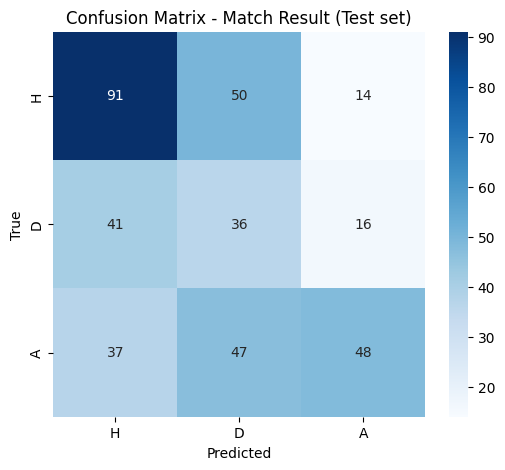

In [23]:
# Tính confusion matrix cho tập test
labels = ["H", "D", "A"]
cm = confusion_matrix(true_res_test, pred_res_test, labels=labels)

# Vẽ heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Match Result (Test set)")
plt.show()

In [24]:
def build_team_map(df_full, X_part):
    meta = df_full.loc[X_part.index, ["HomeTeam", "AwayTeam"]].copy()
    meta["HomeTeam_code"] = X_part["HomeTeam_code"].values
    meta["AwayTeam_code"] = X_part["AwayTeam_code"].values

    home_map = meta[["HomeTeam_code","HomeTeam"]].drop_duplicates().set_index("HomeTeam_code")["HomeTeam"].to_dict()
    away_map = meta[["AwayTeam_code","AwayTeam"]].drop_duplicates().set_index("AwayTeam_code")["AwayTeam"].to_dict()

    both_map = {}
    both_map.update(home_map)
    both_map.update(away_map)
    return both_map

team_map_all = build_team_map(df, X)

def make_split_frame(X_split, true_res, pred_res):
    out = pd.DataFrame(index=X_split.index)
    out["HomeTeam_code"] = X_split["HomeTeam_code"].astype(int)
    out["AwayTeam_code"] = X_split["AwayTeam_code"].astype(int)
    out["HomeTeam"] = out["HomeTeam_code"].map(team_map_all)
    out["AwayTeam"] = out["AwayTeam_code"].map(team_map_all)
    out["True"] = true_res
    out["Pred"] = pred_res
    return out

def overall_acc_by_team(df_res):
    both = pd.concat([
        df_res[["HomeTeam","True","Pred"]].rename(columns={"HomeTeam":"Team"}),
        df_res[["AwayTeam","True","Pred"]].rename(columns={"AwayTeam":"Team"})
    ], axis=0)

    acc_table = both.groupby("Team").apply(lambda g: accuracy_score(g["True"], g["Pred"]))
    acc_table = acc_table.reset_index(name="Overall_Accuracy")
    acc_table["Matches"] = both.groupby("Team").size().values
    acc_table = acc_table.sort_values("Overall_Accuracy", ascending=False).reset_index(drop=True)
    return acc_table

In [25]:
# Gom dữ liệu của split valid
df_train_res = make_split_frame(X_train, true_res_train, pred_res_train)

# Tính overall accuracy theo team cho valid
acc_train_table = overall_acc_by_team(df_train_res)

print("Overall Accuracy by Team (Train)")
acc_train_table

Overall Accuracy by Team (Train)


C:\Users\phong\AppData\Local\Temp\ipykernel_57980\1561386498.py:32: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  acc_table = both.groupby("Team").apply(lambda g: accuracy_score(g["True"], g["Pred"]))


,Team,Overall_Accuracy,Matches
0,Derby,0.710526,38
1,Arsenal,0.625731,684
2,Man United,0.619883,684
3,Man City,0.597953,684
4,Chelsea,0.589181,684
5,Tottenham,0.565789,684
6,QPR,0.561404,114
7,Liverpool,0.555556,684
8,Cardiff,0.552632,76
9,Blackburn,0.541353,266


In [26]:
# Gom dữ liệu của split valid
df_valid_res = make_split_frame(X_valid, true_res_valid, pred_res_valid)

# Tính overall accuracy theo team cho valid
acc_valid_table = overall_acc_by_team(df_valid_res)

print("Overall Accuracy by Team (Valid)")
acc_valid_table

Overall Accuracy by Team (Valid)


C:\Users\phong\AppData\Local\Temp\ipykernel_57980\1561386498.py:32: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  acc_table = both.groupby("Team").apply(lambda g: accuracy_score(g["True"], g["Pred"]))


,Team,Overall_Accuracy,Matches
0,Man City,0.710526,38
1,Arsenal,0.684211,38
2,Nott'm Forest,0.684211,38
3,Sheffield United,0.657895,38
4,Tottenham,0.605263,38
5,Luton,0.605263,38
6,Liverpool,0.605263,38
7,Brentford,0.552632,38
8,Burnley,0.552632,38
9,Aston Villa,0.500000,38


In [27]:
df_test_res = make_split_frame(X_test, true_res_test, pred_res_test)

acc_test_table = overall_acc_by_team(df_test_res)

print("Overall Accuracy by Team (Test)")
acc_test_table

Overall Accuracy by Team (Test)


C:\Users\phong\AppData\Local\Temp\ipykernel_57980\1561386498.py:32: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  acc_table = both.groupby("Team").apply(lambda g: accuracy_score(g["True"], g["Pred"]))


,Team,Overall_Accuracy,Matches
0,Southampton,0.789474,38
1,Liverpool,0.631579,38
2,Newcastle,0.631579,38
3,Man City,0.605263,38
4,Chelsea,0.526316,38
5,Wolves,0.500000,38
6,Ipswich,0.500000,38
7,Arsenal,0.473684,38
8,Man United,0.473684,38
9,Leicester,0.473684,38


## Poisson Regressor

In [28]:
# Khai báo biến cho mô hình
x_train = X_train.copy()
y_home_train = y_home_train.copy()
y_away_train = y_away_train.copy()

x_valid = X_valid.copy()
y_home_valid = y_home_valid.copy()
y_away_valid = y_away_valid.copy()

x_test = X_test.copy()
y_home_test = y_home_test.copy()
y_away_test = y_away_test.copy()

In [29]:
import optuna
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

def objective(trial):
    alpha = trial.suggest_loguniform("alpha", 1e-4, 10)  # dò alpha theo log scale
    max_iter = trial.suggest_int("max_iter", 100, 1000, step=100)

    model = PoissonRegressor(alpha=alpha, max_iter=max_iter)

    # Dùng cross-validation để đánh giá RMSE
    scores = cross_val_score(
        model,
        x_train,
        y_home_train,
        cv=5,
        scoring="neg_root_mean_squared_error",
        n_jobs=-1
    )
    return -np.mean(scores) 

# Tạo study và chạy
study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50)

print("Best params:", study.best_params)
print("Best RMSE:", study.best_value)

# Train model tốt nhất
best_poisson_home = PoissonRegressor(**study.best_params)
best_poisson_home.fit(x_train, y_home_train)


c:\Users\phong\anaconda3\envs\FPT_CL\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-08-14 10:58:08,224] A new study created in memory with name: no-name-b89e27cb-64bf-49fc-80cc-f2a2631a6df4
C:\Users\phong\AppData\Local\Temp\ipykernel_57980\890046884.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-4, 10)  # dò alpha theo log scale
[I 2025-08-14 10:58:11,285] Trial 0 finished with value: 1.2318061359379466 and parameters: {'alpha': 0.0074593432857265485, 'max_iter': 1000}. Best is trial 0 with value: 1.2318061359379466.
[I 2025-08-14 10:58:13,547] Trial 1 finished with value: 1.229758715469284 and par

Best params: {'alpha': 0.34679435936713454, 'max_iter': 1000}
Best RMSE: 1.2297239373742497


,alpha,0.34679435936713454
,fit_intercept,True
,solver,'lbfgs'
,max_iter,1000
,tol,0.0001
,warm_start,False
,verbose,0


In [30]:
import optuna
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Hàm objective cho Optuna
def objective(trial):
    alpha = trial.suggest_loguniform("alpha", 1e-4, 10)  # dò alpha theo log scale
    max_iter = trial.suggest_int("max_iter", 100, 1000, step=100)

    model = PoissonRegressor(alpha=alpha, max_iter=max_iter)

    # Dùng cross-validation để đánh giá RMSE
    scores = cross_val_score(
        model,
        x_train,
        y_away_train,
        cv=5,
        scoring="neg_root_mean_squared_error",
        n_jobs=-1
    )
    return -np.mean(scores)  # Optuna cần minimize, RMSE nhỏ hơn thì tốt hơn

# Tạo study và chạy
study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50) 

print("Best params:", study.best_params)
print("Best RMSE:", study.best_value)

# Train model tốt nhất
best_poisson_away = PoissonRegressor(**study.best_params)
best_poisson_away.fit(x_train, y_away_train)


[I 2025-08-14 10:58:28,961] A new study created in memory with name: no-name-d813603e-0ddb-4e85-9730-d1556c06485a
C:\Users\phong\AppData\Local\Temp\ipykernel_57980\2971878529.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-4, 10)  # dò alpha theo log scale
[I 2025-08-14 10:58:29,218] Trial 0 finished with value: 1.0963425924977515 and parameters: {'alpha': 0.0074593432857265485, 'max_iter': 1000}. Best is trial 0 with value: 1.0963425924977515.
[I 2025-08-14 10:58:29,364] Trial 1 finished with value: 1.096961571162899 and parameters: {'alpha': 0.4570563099801455, 'max_iter': 600}. Best is trial 0 with value: 1.0963425924977515.
[I 2025-08-14 10:58:29,530] Trial 2 finished with value: 1.0970554815024502 and parameters: {'alpha': 0.0006026889128682511, 'max_iter': 200}. Best is tri

Best params: {'alpha': 0.08447414627140128, 'max_iter': 600}
Best RMSE: 1.0958101268945628


,alpha,0.08447414627140128
,fit_intercept,True
,solver,'lbfgs'
,max_iter,600
,tol,0.0001
,warm_start,False
,verbose,0


In [31]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_home_train = rmse(y_home_train, best_poisson_home.predict(x_train))
rmse_home_valid = rmse(y_home_valid, best_poisson_home.predict(x_valid))
rmse_home_test  = rmse(y_home_test,  best_poisson_home.predict(x_test))

rmse_away_train = rmse(y_away_train, best_poisson_away.predict(x_train))
rmse_away_valid = rmse(y_away_valid, best_poisson_away.predict(x_valid))
rmse_away_test  = rmse(y_away_test,  best_poisson_away.predict(x_test))

print("=== RMSE Home Goals ===")
print(f"Train: {rmse_home_train:.4f}")
print(f"Valid: {rmse_home_valid:.4f}")
print(f"Test : {rmse_home_test:.4f}")

print("=== RMSE Away Goals ===")
print(f"Train: {rmse_away_train:.4f}")
print(f"Valid: {rmse_away_valid:.4f}")
print(f"Test : {rmse_away_test:.4f}")

def qwk(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights="quadratic")

y_home_pred_train = np.rint(best_poisson_home.predict(x_train)).astype(int)
y_home_pred_valid = np.rint(best_poisson_home.predict(x_valid)).astype(int)
y_home_pred_test  = np.rint(best_poisson_home.predict(x_test)).astype(int)

qwk_home_train = qwk(y_home_train, y_home_pred_train)
qwk_home_valid = qwk(y_home_valid, y_home_pred_valid)
qwk_home_test  = qwk(y_home_test,  y_home_pred_test)

# AWAY
y_away_pred_train = np.rint(best_poisson_away.predict(x_train)).astype(int)
y_away_pred_valid = np.rint(best_poisson_away.predict(x_valid)).astype(int)
y_away_pred_test  = np.rint(best_poisson_away.predict(x_test)).astype(int)

qwk_away_train = qwk(y_away_train, y_away_pred_train)
qwk_away_valid = qwk(y_away_valid, y_away_pred_valid)
qwk_away_test  = qwk(y_away_test,  y_away_pred_test)

# In kết quả
print("=== QWK Home Goals ===")
print(f"Train: {qwk_home_train:.4f}")
print(f"Valid: {qwk_home_valid:.4f}")
print(f"Test : {qwk_home_test:.4f}")

print("=== QWK Away Goals ===")
print(f"Train: {qwk_away_train:.4f}")
print(f"Valid: {qwk_away_valid:.4f}")
print(f"Test : {qwk_away_test:.4f}")

pred_home_train = np.clip(np.rint(best_poisson_home.predict(x_train)), 0, 9).astype(int)
pred_home_valid = np.clip(np.rint(best_poisson_home.predict(x_valid)), 0, 9).astype(int)
pred_home_test  = np.clip(np.rint(best_poisson_home.predict(x_test)),  0, 9).astype(int)

pred_away_train = np.clip(np.rint(best_poisson_away.predict(x_train)), 0, 9).astype(int)
pred_away_valid = np.clip(np.rint(best_poisson_away.predict(x_valid)), 0, 9).astype(int)
pred_away_test  = np.clip(np.rint(best_poisson_away.predict(x_test)),  0, 9).astype(int)

# Suy ra kết quả H/D/A
def goals_to_result(h, a):
    s = np.sign(h - a)
    return np.where(s > 0, "H", np.where(s == 0, "D", "A"))

pred_res_train = goals_to_result(pred_home_train, pred_away_train)
pred_res_valid = goals_to_result(pred_home_valid, pred_away_valid)
pred_res_test  = goals_to_result(pred_home_test,  pred_away_test)

true_res_train = goals_to_result(y_home_train.to_numpy(), y_away_train.to_numpy())
true_res_valid = goals_to_result(y_home_valid.to_numpy(), y_away_valid.to_numpy())
true_res_test  = goals_to_result(y_home_test.to_numpy(),  y_away_test.to_numpy())

# Accuracy
acc_train = accuracy_score(true_res_train, pred_res_train)
acc_valid = accuracy_score(true_res_valid, pred_res_valid)
acc_test  = accuracy_score(true_res_test,  pred_res_test)

print("=== Match Result Accuracy ===")
print(f"Train: {acc_train:.4f}")
print(f"Valid: {acc_valid:.4f}")
print(f"Test : {acc_test:.4f}")

=== RMSE Home Goals ===
Train: 1.2244
Valid: 1.2720
Test : 1.2168
=== RMSE Away Goals ===
Train: 1.0925
Valid: 1.1997
Test : 1.1469
=== QWK Home Goals ===
Train: 0.2366
Valid: 0.2541
Test : 0.2238
=== QWK Away Goals ===
Train: 0.1615
Valid: 0.2154
Test : 0.1826
=== Match Result Accuracy ===
Train: 0.4841
Valid: 0.5289
Test : 0.4789


In [32]:
results_df = add_model_results_to_df(
    results_df,
    model_name='Poisson regression',
    rmse_home_test=rmse_home_test,
    rmse_away_test=rmse_away_test,
    qwk_home_test=qwk_home_test,
    qwk_away_test=qwk_away_test,
    acc_test=acc_test
)

## Ridge Regression

In [33]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Ridge Regression
ridge = Ridge()

ridge_params = {
    "alpha": [0.001, 0.01, 0.1, 1, 10, 100],
    "max_iter": [300, 500, 1000]
}

ridge_gs_home = GridSearchCV(
    ridge,
    ridge_params,
    scoring="neg_root_mean_squared_error",
    cv=5,
    n_jobs=-1,
    verbose=1
)

ridge_gs_home.fit(x_train, y_home_train)

print("Best params (Home):", ridge_gs_home.best_params_)
print("Best RMSE (Home):", -ridge_gs_home.best_score_)

best_ridge_home = ridge_gs_home.best_estimator_
best_ridge_home.fit(x_train, y_home_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best params (Home): {'alpha': 100, 'max_iter': 300}
Best RMSE (Home): 1.2311473869438312


,alpha,100
,fit_intercept,True
,copy_X,True
,max_iter,300
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [34]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Ridge Regression
ridge = Ridge()

ridge_params = {
    "alpha": [0.001, 0.01, 0.1, 1, 10, 100],
    "max_iter": [300, 500, 1000]
}

ridge_gs_away = GridSearchCV(
    ridge,
    ridge_params,
    scoring="neg_root_mean_squared_error",
    cv=5,
    n_jobs=-1,
    verbose=1
)

ridge_gs_away.fit(x_train, y_away_train)

print("Best params (Away):", ridge_gs_away.best_params_)
print("Best RMSE (Away):", -ridge_gs_away.best_score_)

best_ridge_away = ridge_gs_away.best_estimator_
best_ridge_away.fit(x_train, y_away_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best params (Away): {'alpha': 0.1, 'max_iter': 300}
Best RMSE (Away): 1.0981228066028603


,alpha,0.1
,fit_intercept,True
,copy_X,True
,max_iter,300
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [35]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_home_train = rmse(y_home_train, best_ridge_home.predict(x_train))
rmse_home_valid = rmse(y_home_valid, best_ridge_home.predict(x_valid))
rmse_home_test  = rmse(y_home_test,  best_ridge_home.predict(x_test))

rmse_away_train = rmse(y_away_train, best_ridge_away.predict(x_train))
rmse_away_valid = rmse(y_away_valid, best_ridge_away.predict(x_valid))
rmse_away_test  = rmse(y_away_test,  best_ridge_away.predict(x_test))

print("=== RMSE Home Goals ===")
print(f"Train: {rmse_home_train:.4f}")
print(f"Valid: {rmse_home_valid:.4f}")
print(f"Test : {rmse_home_test:.4f}")

print("=== RMSE Away Goals ===")
print(f"Train: {rmse_away_train:.4f}")
print(f"Valid: {rmse_away_valid:.4f}")
print(f"Test : {rmse_away_test:.4f}")

def qwk(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights="quadratic")

y_home_pred_train = np.rint(best_ridge_home.predict(x_train)).astype(int)
y_home_pred_valid = np.rint(best_ridge_home.predict(x_valid)).astype(int)
y_home_pred_test  = np.rint(best_ridge_home.predict(x_test)).astype(int)

qwk_home_train = qwk(y_home_train, y_home_pred_train)
qwk_home_valid = qwk(y_home_valid, y_home_pred_valid)
qwk_home_test  = qwk(y_home_test,  y_home_pred_test)

# AWAY
y_away_pred_train = np.rint(best_ridge_away.predict(x_train)).astype(int)
y_away_pred_valid = np.rint(best_ridge_away.predict(x_valid)).astype(int)
y_away_pred_test  = np.rint(best_ridge_away.predict(x_test)).astype(int)

qwk_away_train = qwk(y_away_train, y_away_pred_train)
qwk_away_valid = qwk(y_away_valid, y_away_pred_valid)
qwk_away_test  = qwk(y_away_test,  y_away_pred_test)

# In kết quả
print("=== QWK Home Goals ===")
print(f"Train: {qwk_home_train:.4f}")
print(f"Valid: {qwk_home_valid:.4f}")
print(f"Test : {qwk_home_test:.4f}")

print("=== QWK Away Goals ===")
print(f"Train: {qwk_away_train:.4f}")
print(f"Valid: {qwk_away_valid:.4f}")
print(f"Test : {qwk_away_test:.4f}")

pred_home_train = np.clip(np.rint(best_ridge_home.predict(x_train)), 0, 9).astype(int)
pred_home_valid = np.clip(np.rint(best_ridge_home.predict(x_valid)), 0, 9).astype(int)
pred_home_test  = np.clip(np.rint(best_ridge_home.predict(x_test)),  0, 9).astype(int)

pred_away_train = np.clip(np.rint(best_ridge_away.predict(x_train)), 0, 9).astype(int)
pred_away_valid = np.clip(np.rint(best_ridge_away.predict(x_valid)), 0, 9).astype(int)
pred_away_test  = np.clip(np.rint(best_ridge_away.predict(x_test)),  0, 9).astype(int)

# Suy ra kết quả H/D/A
def goals_to_result(h, a):
    s = np.sign(h - a)
    return np.where(s > 0, "H", np.where(s == 0, "D", "A"))

pred_res_train = goals_to_result(pred_home_train, pred_away_train)
pred_res_valid = goals_to_result(pred_home_valid, pred_away_valid)
pred_res_test  = goals_to_result(pred_home_test,  pred_away_test)

true_res_train = goals_to_result(y_home_train.to_numpy(), y_away_train.to_numpy())
true_res_valid = goals_to_result(y_home_valid.to_numpy(), y_away_valid.to_numpy())
true_res_test  = goals_to_result(y_home_test.to_numpy(),  y_away_test.to_numpy())

# Accuracy
acc_train = accuracy_score(true_res_train, pred_res_train)
acc_valid = accuracy_score(true_res_valid, pred_res_valid)
acc_test  = accuracy_score(true_res_test,  pred_res_test)

print("=== Match Result Accuracy ===")
print(f"Train: {acc_train:.4f}")
print(f"Valid: {acc_valid:.4f}")
print(f"Test : {acc_test:.4f}")

=== RMSE Home Goals ===
Train: 1.2241
Valid: 1.2701
Test : 1.2105
=== RMSE Away Goals ===
Train: 1.0923
Valid: 1.2041
Test : 1.1522
=== QWK Home Goals ===
Train: 0.2303
Valid: 0.2575
Test : 0.2438
=== QWK Away Goals ===
Train: 0.1748
Valid: 0.2182
Test : 0.1883
=== Match Result Accuracy ===
Train: 0.4931
Valid: 0.5316
Test : 0.4842


In [36]:
results_df = add_model_results_to_df(
    results_df,
    model_name='Ridge regression',
    rmse_home_test=rmse_home_test,
    rmse_away_test=rmse_away_test,
    qwk_home_test=qwk_home_test,
    qwk_away_test=qwk_away_test,
    acc_test=acc_test
)

## Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Linear Regression
linear = LinearRegression()

linear_params = {
    "fit_intercept": [True, False],
    "positive": [False, True]
}

linear_gs_home = GridSearchCV(
    linear,
    linear_params,
    scoring="neg_root_mean_squared_error",
    cv=5,
    n_jobs=-1,
    verbose=1
)

linear_gs_home.fit(x_train, y_home_train)

print("Best params (Home):", linear_gs_home.best_params_)
print("Best RMSE (Home):", -linear_gs_home.best_score_)

best_linear_home = linear_gs_home.best_estimator_
best_linear_home.fit(x_train, y_home_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best params (Home): {'fit_intercept': True, 'positive': True}
Best RMSE (Home): 1.2293597109506729


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,True


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Linear Regression
linear = LinearRegression()

linear_params = {
    "fit_intercept": [True, False],
    "positive": [False, True]
}

linear_gs_away = GridSearchCV(
    linear,
    linear_params,
    scoring="neg_root_mean_squared_error",
    cv=5,
    n_jobs=-1,
    verbose=1
)

linear_gs_away.fit(x_train, y_away_train)

print("Best params (Away):", linear_gs_away.best_params_)
print("Best RMSE (Away):", -linear_gs_away.best_score_)

best_linear_away = linear_gs_away.best_estimator_
best_linear_away.fit(x_train, y_away_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best params (Away): {'fit_intercept': True, 'positive': False}
Best RMSE (Away): 1.0981264458514666


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_home_train = rmse(y_home_train, best_linear_home.predict(x_train))
rmse_home_valid = rmse(y_home_valid, best_linear_home.predict(x_valid))
rmse_home_test  = rmse(y_home_test,  best_linear_home.predict(x_test))

rmse_away_train = rmse(y_away_train, best_linear_away.predict(x_train))
rmse_away_valid = rmse(y_away_valid, best_linear_away.predict(x_valid))
rmse_away_test  = rmse(y_away_test,  best_linear_away.predict(x_test))

print("=== RMSE Home Goals ===")
print(f"Train: {rmse_home_train:.4f}")
print(f"Valid: {rmse_home_valid:.4f}")
print(f"Test : {rmse_home_test:.4f}")

print("=== RMSE Away Goals ===")
print(f"Train: {rmse_away_train:.4f}")
print(f"Valid: {rmse_away_valid:.4f}")
print(f"Test : {rmse_away_test:.4f}")

def qwk(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights="quadratic")

y_home_pred_train = np.rint(best_linear_home.predict(x_train)).astype(int)
y_home_pred_valid = np.rint(best_linear_home.predict(x_valid)).astype(int)
y_home_pred_test  = np.rint(best_linear_home.predict(x_test)).astype(int)

qwk_home_train = qwk(y_home_train, y_home_pred_train)
qwk_home_valid = qwk(y_home_valid, y_home_pred_valid)
qwk_home_test  = qwk(y_home_test,  y_home_pred_test)

# AWAY
y_away_pred_train = np.rint(best_linear_away.predict(x_train)).astype(int)
y_away_pred_valid = np.rint(best_linear_away.predict(x_valid)).astype(int)
y_away_pred_test  = np.rint(best_linear_away.predict(x_test)).astype(int)

qwk_away_train = qwk(y_away_train, y_away_pred_train)
qwk_away_valid = qwk(y_away_valid, y_away_pred_valid)
qwk_away_test  = qwk(y_away_test,  y_away_pred_test)

# In kết quả
print("=== QWK Home Goals ===")
print(f"Train: {qwk_home_train:.4f}")
print(f"Valid: {qwk_home_valid:.4f}")
print(f"Test : {qwk_home_test:.4f}")

print("=== QWK Away Goals ===")
print(f"Train: {qwk_away_train:.4f}")
print(f"Valid: {qwk_away_valid:.4f}")
print(f"Test : {qwk_away_test:.4f}")

pred_home_train = np.clip(np.rint(best_linear_home.predict(x_train)), 0, 9).astype(int)
pred_home_valid = np.clip(np.rint(best_linear_home.predict(x_valid)), 0, 9).astype(int)
pred_home_test  = np.clip(np.rint(best_linear_home.predict(x_test)),  0, 9).astype(int)

pred_away_train = np.clip(np.rint(best_linear_away.predict(x_train)), 0, 9).astype(int)
pred_away_valid = np.clip(np.rint(best_linear_away.predict(x_valid)), 0, 9).astype(int)
pred_away_test  = np.clip(np.rint(best_linear_away.predict(x_test)),  0, 9).astype(int)

# Suy ra kết quả H/D/A
def goals_to_result(h, a):
    s = np.sign(h - a)
    return np.where(s > 0, "H", np.where(s == 0, "D", "A"))

pred_res_train = goals_to_result(pred_home_train, pred_away_train)
pred_res_valid = goals_to_result(pred_home_valid, pred_away_valid)
pred_res_test  = goals_to_result(pred_home_test,  pred_away_test)

true_res_train = goals_to_result(y_home_train.to_numpy(), y_away_train.to_numpy())
true_res_valid = goals_to_result(y_home_valid.to_numpy(), y_away_valid.to_numpy())
true_res_test  = goals_to_result(y_home_test.to_numpy(),  y_away_test.to_numpy())

# Accuracy
acc_train = accuracy_score(true_res_train, pred_res_train)
acc_valid = accuracy_score(true_res_valid, pred_res_valid)
acc_test  = accuracy_score(true_res_test,  pred_res_test)

print("=== Match Result Accuracy ===")
print(f"Train: {acc_train:.4f}")
print(f"Valid: {acc_valid:.4f}")
print(f"Test : {acc_test:.4f}")

=== RMSE Home Goals ===
Train: 1.2256
Valid: 1.2666
Test : 1.2082
=== RMSE Away Goals ===
Train: 1.0923
Valid: 1.2041
Test : 1.1523
=== QWK Home Goals ===
Train: 0.2289
Valid: 0.2700
Test : 0.2250
=== QWK Away Goals ===
Train: 0.1751
Valid: 0.2182
Test : 0.1883
=== Match Result Accuracy ===
Train: 0.4920
Valid: 0.5316
Test : 0.4789


In [40]:
results_df = add_model_results_to_df(
    results_df,
    model_name='Linear regression',
    rmse_home_test=rmse_home_test,
    rmse_away_test=rmse_away_test,
    qwk_home_test=qwk_home_test,
    qwk_away_test=qwk_away_test,
    acc_test=acc_test
)

## XGBoost

In [41]:
import optuna
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Hàm objective cho Optuna
def objective(trial):
    params = {
        "objective": "count:poisson",  # Poisson regression
        "n_estimators": trial.suggest_int("n_estimators", 300, 1200),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 10.0, log=True),
        "n_jobs": -1,
        "random_state": 42
    }

    model = XGBRegressor(**params)
    scores = cross_val_score(model, x_train, y_home_train, cv=5, scoring="neg_root_mean_squared_error")
    return -np.mean(scores)  # RMSE

# Tạo study và chạy tối ưu
study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50, show_progress_bar=True)

print("Best params:", study.best_params)
print("Best RMSE:", study.best_value)

# Train mô hình tốt nhất
best_xgb_home = XGBRegressor(**study.best_params)
best_xgb_home.fit(x_train, y_home_train)


[I 2025-08-14 10:58:38,896] A new study created in memory with name: no-name-dff77af9-e9af-46b5-be3b-3aa9a8780bb2
Best trial: 0. Best value: 1.44745:   2%|▏         | 1/50 [00:07<06:28,  7.92s/it]

[I 2025-08-14 10:58:46,819] Trial 0 finished with value: 1.4474474668502808 and parameters: {'n_estimators': 637, 'max_depth': 10, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'reg_alpha': 2.5348407664333426e-07, 'reg_lambda': 3.3323645788192616e-08}. Best is trial 0 with value: 1.4474474668502808.


Best trial: 1. Best value: 1.38408:   4%|▍         | 2/50 [00:15<06:17,  7.86s/it]

[I 2025-08-14 10:58:54,631] Trial 1 finished with value: 1.384080719947815 and parameters: {'n_estimators': 1080, 'max_depth': 7, 'learning_rate': 0.11114989443094977, 'subsample': 0.608233797718321, 'colsample_bytree': 0.9879639408647978, 'reg_alpha': 0.31044435499483225, 'reg_lambda': 8.148018307012941e-07}. Best is trial 1 with value: 1.384080719947815.


Best trial: 2. Best value: 1.24039:   6%|▌         | 3/50 [00:17<04:02,  5.15s/it]

[I 2025-08-14 10:58:56,561] Trial 2 finished with value: 1.2403884649276733 and parameters: {'n_estimators': 463, 'max_depth': 4, 'learning_rate': 0.028145092716060652, 'subsample': 0.8099025726528951, 'colsample_bytree': 0.7727780074568463, 'reg_alpha': 4.17890272377219e-06, 'reg_lambda': 0.0032112643094417484}. Best is trial 2 with value: 1.2403884649276733.


Best trial: 2. Best value: 1.24039:   8%|▊         | 4/50 [00:19<03:01,  3.94s/it]

[I 2025-08-14 10:58:58,639] Trial 3 finished with value: 1.2479382276535034 and parameters: {'n_estimators': 425, 'max_depth': 5, 'learning_rate': 0.03476649150592621, 'subsample': 0.7824279936868144, 'colsample_bytree': 0.9140703845572055, 'reg_alpha': 6.267062696005991e-07, 'reg_lambda': 0.00042472707398058225}. Best is trial 2 with value: 1.2403884649276733.


Best trial: 2. Best value: 1.24039:  10%|█         | 5/50 [00:22<02:36,  3.47s/it]

[I 2025-08-14 10:59:01,284] Trial 4 finished with value: 1.2544707775115966 and parameters: {'n_estimators': 833, 'max_depth': 3, 'learning_rate': 0.07896186801026692, 'subsample': 0.6682096494749166, 'colsample_bytree': 0.6260206371941118, 'reg_alpha': 3.4671276804481113, 'reg_lambda': 4.905556676028774}. Best is trial 2 with value: 1.2403884649276733.


Best trial: 2. Best value: 1.24039:  12%|█▏        | 6/50 [00:27<03:00,  4.10s/it]

[I 2025-08-14 10:59:06,618] Trial 5 finished with value: 1.2461256504058837 and parameters: {'n_estimators': 1028, 'max_depth': 5, 'learning_rate': 0.013940346079873234, 'subsample': 0.8736932106048627, 'colsample_bytree': 0.7760609974958406, 'reg_alpha': 1.254134495897175e-07, 'reg_lambda': 0.00028614897264046574}. Best is trial 2 with value: 1.2403884649276733.


Best trial: 2. Best value: 1.24039:  14%|█▍        | 7/50 [00:33<03:24,  4.76s/it]

[I 2025-08-14 10:59:12,735] Trial 6 finished with value: 1.2678962707519532 and parameters: {'n_estimators': 330, 'max_depth': 10, 'learning_rate': 0.024112898115291985, 'subsample': 0.8650089137415928, 'colsample_bytree': 0.7246844304357644, 'reg_alpha': 0.0004793052550782129, 'reg_lambda': 0.0008325158565947976}. Best is trial 2 with value: 1.2403884649276733.


Best trial: 2. Best value: 1.24039:  16%|█▌        | 8/50 [00:41<03:59,  5.70s/it]

[I 2025-08-14 10:59:20,429] Trial 7 finished with value: 1.400476098060608 and parameters: {'n_estimators': 466, 'max_depth': 10, 'learning_rate': 0.13962563737015762, 'subsample': 0.9757995766256756, 'colsample_bytree': 0.9579309401710595, 'reg_alpha': 0.002404915432737351, 'reg_lambda': 1.9809253750493907}. Best is trial 2 with value: 1.2403884649276733.


Best trial: 8. Best value: 1.23465:  18%|█▊        | 9/50 [00:43<03:01,  4.43s/it]

[I 2025-08-14 10:59:22,072] Trial 8 finished with value: 1.2346500635147095 and parameters: {'n_estimators': 379, 'max_depth': 4, 'learning_rate': 0.011662890273931383, 'subsample': 0.7301321323053057, 'colsample_bytree': 0.7554709158757928, 'reg_alpha': 2.7678419414850017e-06, 'reg_lambda': 0.28749982347407854}. Best is trial 8 with value: 1.2346500635147095.


Best trial: 8. Best value: 1.23465:  20%|██        | 10/50 [00:46<02:40,  4.02s/it]

[I 2025-08-14 10:59:25,184] Trial 9 finished with value: 1.2689673900604248 and parameters: {'n_estimators': 621, 'max_depth': 5, 'learning_rate': 0.06333268775321843, 'subsample': 0.6563696899899051, 'colsample_bytree': 0.9208787923016158, 'reg_alpha': 4.6876566400928895e-08, 'reg_lambda': 7.620481786158549}. Best is trial 8 with value: 1.2346500635147095.


Best trial: 8. Best value: 1.23465:  22%|██▏       | 11/50 [00:52<02:57,  4.55s/it]

[I 2025-08-14 10:59:30,918] Trial 10 finished with value: 1.461850118637085 and parameters: {'n_estimators': 762, 'max_depth': 7, 'learning_rate': 0.2704729722717779, 'subsample': 0.7387403565626487, 'colsample_bytree': 0.8560354009870226, 'reg_alpha': 2.6462851656372854e-05, 'reg_lambda': 0.0374370877043612}. Best is trial 8 with value: 1.2346500635147095.


Best trial: 8. Best value: 1.23465:  24%|██▍       | 12/50 [00:53<02:12,  3.49s/it]

[I 2025-08-14 10:59:31,990] Trial 11 finished with value: 1.2355193138122558 and parameters: {'n_estimators': 310, 'max_depth': 3, 'learning_rate': 0.010145748985881197, 'subsample': 0.7347390152853027, 'colsample_bytree': 0.7834697240695936, 'reg_alpha': 7.635962689328252e-06, 'reg_lambda': 0.05032833305597619}. Best is trial 8 with value: 1.2346500635147095.


Best trial: 8. Best value: 1.23465:  26%|██▌       | 13/50 [00:54<01:42,  2.78s/it]

[I 2025-08-14 10:59:33,128] Trial 12 finished with value: 1.2348682403564453 and parameters: {'n_estimators': 315, 'max_depth': 3, 'learning_rate': 0.010374595437534068, 'subsample': 0.7225330368110788, 'colsample_bytree': 0.7067964291781479, 'reg_alpha': 3.568355202337311e-05, 'reg_lambda': 0.08663086222181629}. Best is trial 8 with value: 1.2346500635147095.


Best trial: 13. Best value: 1.23393:  28%|██▊       | 14/50 [00:56<01:33,  2.60s/it]

[I 2025-08-14 10:59:35,317] Trial 13 finished with value: 1.2339284896850586 and parameters: {'n_estimators': 589, 'max_depth': 3, 'learning_rate': 0.01697813708497521, 'subsample': 0.7068242163432112, 'colsample_bytree': 0.6962642580113091, 'reg_alpha': 0.00011276577074885162, 'reg_lambda': 0.025574091808630024}. Best is trial 13 with value: 1.2339284896850586.


Best trial: 13. Best value: 1.23393:  30%|███       | 15/50 [01:00<01:43,  2.94s/it]

[I 2025-08-14 10:59:39,057] Trial 14 finished with value: 1.2469946146011353 and parameters: {'n_estimators': 588, 'max_depth': 6, 'learning_rate': 0.019223776958726204, 'subsample': 0.6829430306158502, 'colsample_bytree': 0.7071284522827691, 'reg_alpha': 0.00934669040346174, 'reg_lambda': 6.458243615671756e-06}. Best is trial 13 with value: 1.2339284896850586.


Best trial: 13. Best value: 1.23393:  32%|███▏      | 16/50 [01:03<01:45,  3.10s/it]

[I 2025-08-14 10:59:42,508] Trial 15 finished with value: 1.2539851427078248 and parameters: {'n_estimators': 917, 'max_depth': 4, 'learning_rate': 0.03986818140251038, 'subsample': 0.6151525197196637, 'colsample_bytree': 0.6017170553040557, 'reg_alpha': 0.017117963499773074, 'reg_lambda': 0.29012324076528895}. Best is trial 13 with value: 1.2339284896850586.


Best trial: 13. Best value: 1.23393:  34%|███▍      | 17/50 [01:09<02:09,  3.93s/it]

[I 2025-08-14 10:59:48,377] Trial 16 finished with value: 1.2630566120147706 and parameters: {'n_estimators': 580, 'max_depth': 8, 'learning_rate': 0.019630700268926382, 'subsample': 0.9272369270860196, 'colsample_bytree': 0.8393132044283657, 'reg_alpha': 1.1156983506498179e-08, 'reg_lambda': 0.006935352342954365}. Best is trial 13 with value: 1.2339284896850586.


Best trial: 13. Best value: 1.23393:  36%|███▌      | 18/50 [01:12<01:55,  3.61s/it]

[I 2025-08-14 10:59:51,251] Trial 17 finished with value: 1.2383639574050904 and parameters: {'n_estimators': 704, 'max_depth': 4, 'learning_rate': 0.01592011290590129, 'subsample': 0.7794974642857501, 'colsample_bytree': 0.6627861063196333, 'reg_alpha': 0.00029837177996092963, 'reg_lambda': 4.214462363868563e-05}. Best is trial 13 with value: 1.2339284896850586.


Best trial: 13. Best value: 1.23393:  38%|███▊      | 19/50 [01:15<01:46,  3.44s/it]

[I 2025-08-14 10:59:54,283] Trial 18 finished with value: 1.2645945310592652 and parameters: {'n_estimators': 513, 'max_depth': 6, 'learning_rate': 0.05056132669602045, 'subsample': 0.7072225629581622, 'colsample_bytree': 0.7439696155035862, 'reg_alpha': 1.211433267530832e-06, 'reg_lambda': 0.3563118825891217}. Best is trial 13 with value: 1.2339284896850586.


Best trial: 13. Best value: 1.23393:  40%|████      | 20/50 [01:16<01:25,  2.86s/it]

[I 2025-08-14 10:59:55,797] Trial 19 finished with value: 1.2351986169815063 and parameters: {'n_estimators': 388, 'max_depth': 4, 'learning_rate': 0.013556514537701597, 'subsample': 0.7648361120291718, 'colsample_bytree': 0.8505915654206465, 'reg_alpha': 8.411985243210281e-05, 'reg_lambda': 0.008521941755440318}. Best is trial 13 with value: 1.2339284896850586.


Best trial: 13. Best value: 1.23393:  42%|████▏     | 21/50 [01:21<01:41,  3.48s/it]

[I 2025-08-14 11:00:00,734] Trial 20 finished with value: 1.2597573041915893 and parameters: {'n_estimators': 526, 'max_depth': 8, 'learning_rate': 0.02629978253970721, 'subsample': 0.647126451627117, 'colsample_bytree': 0.6733221423256304, 'reg_alpha': 0.12002649280632736, 'reg_lambda': 0.8643435907895213}. Best is trial 13 with value: 1.2339284896850586.


Best trial: 21. Best value: 1.23243:  44%|████▍     | 22/50 [01:23<01:18,  2.82s/it]

[I 2025-08-14 11:00:01,990] Trial 21 finished with value: 1.2324323654174805 and parameters: {'n_estimators': 385, 'max_depth': 3, 'learning_rate': 0.012058110740498632, 'subsample': 0.7124637060207432, 'colsample_bytree': 0.709360796174, 'reg_alpha': 3.725328434962811e-05, 'reg_lambda': 0.09126245791197303}. Best is trial 21 with value: 1.2324323654174805.


Best trial: 21. Best value: 1.23243:  46%|████▌     | 23/50 [01:26<01:20,  2.99s/it]

[I 2025-08-14 11:00:05,393] Trial 22 finished with value: 1.2353559017181397 and parameters: {'n_estimators': 1193, 'max_depth': 3, 'learning_rate': 0.010133586566302052, 'subsample': 0.6979167185362449, 'colsample_bytree': 0.7484287126881551, 'reg_alpha': 3.6244464006940683e-06, 'reg_lambda': 0.027483764460619564}. Best is trial 21 with value: 1.2324323654174805.


Best trial: 21. Best value: 1.23243:  48%|████▊     | 24/50 [01:27<01:04,  2.46s/it]

[I 2025-08-14 11:00:06,629] Trial 23 finished with value: 1.233193588256836 and parameters: {'n_estimators': 392, 'max_depth': 3, 'learning_rate': 0.016606885567229147, 'subsample': 0.7506636754908317, 'colsample_bytree': 0.819469377449387, 'reg_alpha': 0.00043406806305080104, 'reg_lambda': 0.20608702105750798}. Best is trial 21 with value: 1.2324323654174805.


Best trial: 21. Best value: 1.23243:  50%|█████     | 25/50 [01:29<00:58,  2.34s/it]

[I 2025-08-14 11:00:08,685] Trial 24 finished with value: 1.2362090587615966 and parameters: {'n_estimators': 702, 'max_depth': 3, 'learning_rate': 0.018001825398630194, 'subsample': 0.7565045105033923, 'colsample_bytree': 0.8133740668103827, 'reg_alpha': 0.0007206258696352067, 'reg_lambda': 0.11637922746361587}. Best is trial 21 with value: 1.2324323654174805.


Best trial: 21. Best value: 1.23243:  52%|█████▏    | 26/50 [01:31<00:54,  2.27s/it]

[I 2025-08-14 11:00:10,800] Trial 25 finished with value: 1.241341733932495 and parameters: {'n_estimators': 482, 'max_depth': 5, 'learning_rate': 0.021801397503426412, 'subsample': 0.693495024053994, 'colsample_bytree': 0.6904955593720772, 'reg_alpha': 9.34588776409258e-05, 'reg_lambda': 0.0023738999912511537}. Best is trial 21 with value: 1.2324323654174805.


Best trial: 21. Best value: 1.23243:  54%|█████▍    | 27/50 [01:33<00:45,  1.96s/it]

[I 2025-08-14 11:00:12,039] Trial 26 finished with value: 1.2370316505432128 and parameters: {'n_estimators': 398, 'max_depth': 3, 'learning_rate': 0.03378049189532395, 'subsample': 0.8291379889119987, 'colsample_bytree': 0.8955659163710472, 'reg_alpha': 0.004470773000380173, 'reg_lambda': 8.041769114733623e-05}. Best is trial 21 with value: 1.2324323654174805.


Best trial: 21. Best value: 1.23243:  56%|█████▌    | 28/50 [01:35<00:44,  2.04s/it]

[I 2025-08-14 11:00:14,266] Trial 27 finished with value: 1.2348725080490113 and parameters: {'n_estimators': 546, 'max_depth': 4, 'learning_rate': 0.014023347876983932, 'subsample': 0.6448235604394638, 'colsample_bytree': 0.6334385110518281, 'reg_alpha': 0.0654384336317935, 'reg_lambda': 0.016863983130422467}. Best is trial 21 with value: 1.2324323654174805.


Best trial: 21. Best value: 1.23243:  58%|█████▊    | 29/50 [01:37<00:43,  2.05s/it]

[I 2025-08-14 11:00:16,334] Trial 28 finished with value: 1.2343074083328247 and parameters: {'n_estimators': 644, 'max_depth': 3, 'learning_rate': 0.014985704775192862, 'subsample': 0.7922844645268905, 'colsample_bytree': 0.8076487826850242, 'reg_alpha': 0.0006849916999893925, 'reg_lambda': 1.4864401559810791}. Best is trial 21 with value: 1.2324323654174805.


Best trial: 21. Best value: 1.23243:  60%|██████    | 30/50 [01:49<01:41,  5.07s/it]

[I 2025-08-14 11:00:28,433] Trial 29 finished with value: 1.3654192209243774 and parameters: {'n_estimators': 820, 'max_depth': 9, 'learning_rate': 0.047647603382107814, 'subsample': 0.8108422661272028, 'colsample_bytree': 0.7294195257167995, 'reg_alpha': 1.4504660965540652e-05, 'reg_lambda': 0.0028840171192632135}. Best is trial 21 with value: 1.2324323654174805.


Best trial: 21. Best value: 1.23243:  62%|██████▏   | 31/50 [01:52<01:22,  4.35s/it]

[I 2025-08-14 11:00:31,129] Trial 30 finished with value: 1.2480051040649414 and parameters: {'n_estimators': 436, 'max_depth': 6, 'learning_rate': 0.026140093404580206, 'subsample': 0.7552033789375153, 'colsample_bytree': 0.6385446645619135, 'reg_alpha': 0.00011847177666893207, 'reg_lambda': 1.5777530655240984e-08}. Best is trial 21 with value: 1.2324323654174805.


Best trial: 21. Best value: 1.23243:  64%|██████▍   | 32/50 [01:54<01:08,  3.79s/it]

[I 2025-08-14 11:00:33,614] Trial 31 finished with value: 1.2347423553466796 and parameters: {'n_estimators': 689, 'max_depth': 3, 'learning_rate': 0.015931391168340768, 'subsample': 0.7872577372955551, 'colsample_bytree': 0.8150560735592428, 'reg_alpha': 0.0013658322357601989, 'reg_lambda': 1.3366252823198241}. Best is trial 21 with value: 1.2324323654174805.


Best trial: 21. Best value: 1.23243:  66%|██████▌   | 33/50 [01:57<01:00,  3.53s/it]

[I 2025-08-14 11:00:36,544] Trial 32 finished with value: 1.2373950481414795 and parameters: {'n_estimators': 605, 'max_depth': 4, 'learning_rate': 0.012951403529589185, 'subsample': 0.844668485731418, 'colsample_bytree': 0.8098012540621115, 'reg_alpha': 0.00022458767187205994, 'reg_lambda': 0.8776291852934359}. Best is trial 21 with value: 1.2324323654174805.


Best trial: 21. Best value: 1.23243:  68%|██████▊   | 34/50 [02:02<01:01,  3.81s/it]

[I 2025-08-14 11:00:41,008] Trial 33 finished with value: 1.2349453210830688 and parameters: {'n_estimators': 665, 'max_depth': 3, 'learning_rate': 0.017293075711504066, 'subsample': 0.7091043727190458, 'colsample_bytree': 0.7874990814892123, 'reg_alpha': 0.02042755602432231, 'reg_lambda': 1.6164201035758062e-07}. Best is trial 21 with value: 1.2324323654174805.


Best trial: 21. Best value: 1.23243:  70%|███████   | 35/50 [02:06<01:01,  4.07s/it]

[I 2025-08-14 11:00:45,682] Trial 34 finished with value: 1.2460410356521607 and parameters: {'n_estimators': 756, 'max_depth': 4, 'learning_rate': 0.0300121424233423, 'subsample': 0.8068045216168417, 'colsample_bytree': 0.8722448208885095, 'reg_alpha': 0.0010962634175439151, 'reg_lambda': 0.14474669419812272}. Best is trial 21 with value: 1.2324323654174805.


Best trial: 21. Best value: 1.23243:  72%|███████▏  | 36/50 [02:08<00:45,  3.24s/it]

[I 2025-08-14 11:00:46,977] Trial 35 finished with value: 1.2334290266036987 and parameters: {'n_estimators': 363, 'max_depth': 3, 'learning_rate': 0.022602955914842054, 'subsample': 0.6286877475284227, 'colsample_bytree': 0.8251728345341853, 'reg_alpha': 4.3414492788805965e-05, 'reg_lambda': 3.5557343399502948}. Best is trial 21 with value: 1.2324323654174805.


Best trial: 21. Best value: 1.23243:  74%|███████▍  | 37/50 [02:09<00:36,  2.80s/it]

[I 2025-08-14 11:00:48,741] Trial 36 finished with value: 1.2388559818267821 and parameters: {'n_estimators': 360, 'max_depth': 5, 'learning_rate': 0.022237119738396063, 'subsample': 0.621305627733484, 'colsample_bytree': 0.8353355370755438, 'reg_alpha': 5.537178648457965e-07, 'reg_lambda': 7.6083537883899135}. Best is trial 21 with value: 1.2324323654174805.


Best trial: 21. Best value: 1.23243:  76%|███████▌  | 38/50 [02:11<00:30,  2.54s/it]

[I 2025-08-14 11:00:50,688] Trial 37 finished with value: 1.239790105819702 and parameters: {'n_estimators': 450, 'max_depth': 4, 'learning_rate': 0.039804928811105145, 'subsample': 0.6741913987523481, 'colsample_bytree': 0.7631317828357674, 'reg_alpha': 9.650554673574547, 'reg_lambda': 3.4787925294019897}. Best is trial 21 with value: 1.2324323654174805.


Best trial: 21. Best value: 1.23243:  78%|███████▊  | 39/50 [02:13<00:23,  2.15s/it]

[I 2025-08-14 11:00:51,916] Trial 38 finished with value: 1.2461815357208252 and parameters: {'n_estimators': 352, 'max_depth': 3, 'learning_rate': 0.09203308459148192, 'subsample': 0.606753853297491, 'colsample_bytree': 0.6848580639949049, 'reg_alpha': 2.526955235367538e-05, 'reg_lambda': 0.5027638224817771}. Best is trial 21 with value: 1.2324323654174805.


Best trial: 21. Best value: 1.23243:  80%|████████  | 40/50 [02:15<00:21,  2.12s/it]

[I 2025-08-14 11:00:53,967] Trial 39 finished with value: 1.2369408845901488 and parameters: {'n_estimators': 412, 'max_depth': 5, 'learning_rate': 0.012217111051378071, 'subsample': 0.6336213280436958, 'colsample_bytree': 0.8921696849354602, 'reg_alpha': 1.117134001835732e-05, 'reg_lambda': 0.000742729097710619}. Best is trial 21 with value: 1.2324323654174805.


Best trial: 21. Best value: 1.23243:  82%|████████▏ | 41/50 [02:17<00:18,  2.10s/it]

[I 2025-08-14 11:00:56,025] Trial 40 finished with value: 1.2421784400939941 and parameters: {'n_estimators': 491, 'max_depth': 4, 'learning_rate': 0.03149171980081298, 'subsample': 0.6632543975562833, 'colsample_bytree': 0.9891454166729838, 'reg_alpha': 0.5565037783983552, 'reg_lambda': 0.008490386681835679}. Best is trial 21 with value: 1.2324323654174805.


Best trial: 21. Best value: 1.23243:  84%|████████▍ | 42/50 [02:19<00:16,  2.07s/it]

[I 2025-08-14 11:00:58,022] Trial 41 finished with value: 1.23348708152771 and parameters: {'n_estimators': 559, 'max_depth': 3, 'learning_rate': 0.015924404870837443, 'subsample': 0.7727149203639424, 'colsample_bytree': 0.8276155831677042, 'reg_alpha': 5.750909716311569e-05, 'reg_lambda': 2.323754353435624}. Best is trial 21 with value: 1.2324323654174805.


Best trial: 21. Best value: 1.23243:  86%|████████▌ | 43/50 [02:20<00:12,  1.81s/it]

[I 2025-08-14 11:00:59,223] Trial 42 finished with value: 1.2325491428375244 and parameters: {'n_estimators': 302, 'max_depth': 3, 'learning_rate': 0.020904026790886838, 'subsample': 0.7567167036044842, 'colsample_bytree': 0.8266402508612634, 'reg_alpha': 4.134195202659763e-05, 'reg_lambda': 3.282393210791632}. Best is trial 21 with value: 1.2324323654174805.


Best trial: 21. Best value: 1.23243:  88%|████████▊ | 44/50 [02:21<00:09,  1.66s/it]

[I 2025-08-14 11:01:00,545] Trial 43 finished with value: 1.2330575227737426 and parameters: {'n_estimators': 306, 'max_depth': 3, 'learning_rate': 0.02177247771963796, 'subsample': 0.754898871004038, 'colsample_bytree': 0.8263663719434056, 'reg_alpha': 1.436923236903548e-06, 'reg_lambda': 3.0491969132018197}. Best is trial 21 with value: 1.2324323654174805.


Best trial: 21. Best value: 1.23243:  90%|█████████ | 45/50 [02:22<00:07,  1.53s/it]

[I 2025-08-14 11:01:01,749] Trial 44 finished with value: 1.2334653377532958 and parameters: {'n_estimators': 302, 'max_depth': 3, 'learning_rate': 0.021556492675179492, 'subsample': 0.7427678118604039, 'colsample_bytree': 0.8721053150054328, 'reg_alpha': 1.3357315461003398e-06, 'reg_lambda': 7.965950058696257}. Best is trial 21 with value: 1.2324323654174805.


Best trial: 21. Best value: 1.23243:  92%|█████████▏| 46/50 [02:24<00:06,  1.53s/it]

[I 2025-08-14 11:01:03,280] Trial 45 finished with value: 1.2596137523651123 and parameters: {'n_estimators': 349, 'max_depth': 4, 'learning_rate': 0.13362232332253005, 'subsample': 0.8858325114800301, 'colsample_bytree': 0.785399352581338, 'reg_alpha': 2.755466897236586e-07, 'reg_lambda': 3.143746295426183}. Best is trial 21 with value: 1.2324323654174805.


Best trial: 21. Best value: 1.23243:  94%|█████████▍| 47/50 [02:26<00:04,  1.58s/it]

[I 2025-08-14 11:01:04,979] Trial 46 finished with value: 1.2748778104782104 and parameters: {'n_estimators': 428, 'max_depth': 3, 'learning_rate': 0.1885739623232732, 'subsample': 0.7195331111227534, 'colsample_bytree': 0.9326229424799494, 'reg_alpha': 5.3296197683730506e-06, 'reg_lambda': 0.11488070290872084}. Best is trial 21 with value: 1.2324323654174805.


Best trial: 21. Best value: 1.23243:  96%|█████████▌| 48/50 [02:27<00:03,  1.55s/it]

[I 2025-08-14 11:01:06,476] Trial 47 finished with value: 1.2380773782730103 and parameters: {'n_estimators': 340, 'max_depth': 4, 'learning_rate': 0.02409351599712126, 'subsample': 0.747795796238634, 'colsample_bytree': 0.8661782887544465, 'reg_alpha': 8.423608175530777e-08, 'reg_lambda': 0.41785611728052835}. Best is trial 21 with value: 1.2324323654174805.


Best trial: 21. Best value: 1.23243:  98%|█████████▊| 49/50 [02:28<00:01,  1.41s/it]

[I 2025-08-14 11:01:07,553] Trial 48 finished with value: 1.23573637008667 and parameters: {'n_estimators': 301, 'max_depth': 3, 'learning_rate': 0.038298297445213556, 'subsample': 0.8222988783787142, 'colsample_bytree': 0.8895380446045421, 'reg_alpha': 1.9937290115068497e-05, 'reg_lambda': 9.484492734942522}. Best is trial 21 with value: 1.2324323654174805.


Best trial: 21. Best value: 1.23243: 100%|██████████| 50/50 [02:30<00:00,  3.01s/it]


[I 2025-08-14 11:01:09,505] Trial 49 finished with value: 1.2364752769470215 and parameters: {'n_estimators': 411, 'max_depth': 5, 'learning_rate': 0.011464793145233198, 'subsample': 0.6844660418173001, 'colsample_bytree': 0.7982520294643788, 'reg_alpha': 0.00026005166242493806, 'reg_lambda': 3.374500298300383}. Best is trial 21 with value: 1.2324323654174805.
Best params: {'n_estimators': 385, 'max_depth': 3, 'learning_rate': 0.012058110740498632, 'subsample': 0.7124637060207432, 'colsample_bytree': 0.709360796174, 'reg_alpha': 3.725328434962811e-05, 'reg_lambda': 0.09126245791197303}
Best RMSE: 1.2324323654174805


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.709360796174
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [42]:
# Hàm objective cho Optuna
def objective(trial):
    params = {
        "objective": "count:poisson",  # Poisson regression
        "n_estimators": trial.suggest_int("n_estimators", 300, 1200),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 10.0, log=True),
        "n_jobs": -1,
        "random_state": 42
    }

    model = XGBRegressor(**params)
    scores = cross_val_score(model, x_train, y_away_train, cv=5, scoring="neg_root_mean_squared_error")
    return -np.mean(scores)  # RMSE

# Tạo study và chạy tối ưu
study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50, show_progress_bar=True)

print("Best params:", study.best_params)
print("Best RMSE:", study.best_value)

# Train mô hình tốt nhất
best_xgb_away = XGBRegressor(**study.best_params)
best_xgb_away.fit(x_train, y_away_train)

[I 2025-08-14 11:01:09,731] A new study created in memory with name: no-name-1e3429a0-d252-4f37-a6cc-5df1b9c4cccc
Best trial: 0. Best value: 1.30006:   2%|▏         | 1/50 [00:09<07:31,  9.22s/it]

[I 2025-08-14 11:01:18,948] Trial 0 finished with value: 1.3000593423843383 and parameters: {'n_estimators': 637, 'max_depth': 10, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'reg_alpha': 2.5348407664333426e-07, 'reg_lambda': 3.3323645788192616e-08}. Best is trial 0 with value: 1.3000593423843383.


Best trial: 1. Best value: 1.23689:   4%|▍         | 2/50 [00:17<06:52,  8.60s/it]

[I 2025-08-14 11:01:27,114] Trial 1 finished with value: 1.2368925094604493 and parameters: {'n_estimators': 1080, 'max_depth': 7, 'learning_rate': 0.11114989443094977, 'subsample': 0.608233797718321, 'colsample_bytree': 0.9879639408647978, 'reg_alpha': 0.31044435499483225, 'reg_lambda': 8.148018307012941e-07}. Best is trial 1 with value: 1.2368925094604493.


Best trial: 2. Best value: 1.10772:   6%|▌         | 3/50 [00:19<04:19,  5.53s/it]

[I 2025-08-14 11:01:28,993] Trial 2 finished with value: 1.107721996307373 and parameters: {'n_estimators': 463, 'max_depth': 4, 'learning_rate': 0.028145092716060652, 'subsample': 0.8099025726528951, 'colsample_bytree': 0.7727780074568463, 'reg_alpha': 4.17890272377219e-06, 'reg_lambda': 0.0032112643094417484}. Best is trial 2 with value: 1.107721996307373.


Best trial: 2. Best value: 1.10772:   8%|▊         | 4/50 [00:21<03:19,  4.33s/it]

[I 2025-08-14 11:01:31,479] Trial 3 finished with value: 1.1151973247528075 and parameters: {'n_estimators': 425, 'max_depth': 5, 'learning_rate': 0.03476649150592621, 'subsample': 0.7824279936868144, 'colsample_bytree': 0.9140703845572055, 'reg_alpha': 6.267062696005991e-07, 'reg_lambda': 0.00042472707398058225}. Best is trial 2 with value: 1.107721996307373.


Best trial: 2. Best value: 1.10772:  10%|█         | 5/50 [00:24<02:52,  3.82s/it]

[I 2025-08-14 11:01:34,407] Trial 4 finished with value: 1.122119426727295 and parameters: {'n_estimators': 833, 'max_depth': 3, 'learning_rate': 0.07896186801026692, 'subsample': 0.6682096494749166, 'colsample_bytree': 0.6260206371941118, 'reg_alpha': 3.4671276804481113, 'reg_lambda': 4.905556676028774}. Best is trial 2 with value: 1.107721996307373.


Best trial: 2. Best value: 1.10772:  12%|█▏        | 6/50 [00:30<03:12,  4.38s/it]

[I 2025-08-14 11:01:39,856] Trial 5 finished with value: 1.1130527019500733 and parameters: {'n_estimators': 1028, 'max_depth': 5, 'learning_rate': 0.013940346079873234, 'subsample': 0.8736932106048627, 'colsample_bytree': 0.7760609974958406, 'reg_alpha': 1.254134495897175e-07, 'reg_lambda': 0.00028614897264046574}. Best is trial 2 with value: 1.107721996307373.


Best trial: 2. Best value: 1.10772:  14%|█▍        | 7/50 [00:35<03:26,  4.80s/it]

[I 2025-08-14 11:01:45,542] Trial 6 finished with value: 1.127744197845459 and parameters: {'n_estimators': 330, 'max_depth': 10, 'learning_rate': 0.024112898115291985, 'subsample': 0.8650089137415928, 'colsample_bytree': 0.7246844304357644, 'reg_alpha': 0.0004793052550782129, 'reg_lambda': 0.0008325158565947976}. Best is trial 2 with value: 1.107721996307373.


Best trial: 2. Best value: 1.10772:  16%|█▌        | 8/50 [00:42<03:51,  5.50s/it]

[I 2025-08-14 11:01:52,535] Trial 7 finished with value: 1.256079411506653 and parameters: {'n_estimators': 466, 'max_depth': 10, 'learning_rate': 0.13962563737015762, 'subsample': 0.9757995766256756, 'colsample_bytree': 0.9579309401710595, 'reg_alpha': 0.002404915432737351, 'reg_lambda': 1.9809253750493907}. Best is trial 2 with value: 1.107721996307373.


Best trial: 8. Best value: 1.10057:  18%|█▊        | 9/50 [00:44<02:53,  4.24s/it]

[I 2025-08-14 11:01:54,007] Trial 8 finished with value: 1.1005702257156371 and parameters: {'n_estimators': 379, 'max_depth': 4, 'learning_rate': 0.011662890273931383, 'subsample': 0.7301321323053057, 'colsample_bytree': 0.7554709158757928, 'reg_alpha': 2.7678419414850017e-06, 'reg_lambda': 0.28749982347407854}. Best is trial 8 with value: 1.1005702257156371.


Best trial: 8. Best value: 1.10057:  20%|██        | 10/50 [00:47<02:32,  3.82s/it]

[I 2025-08-14 11:01:56,871] Trial 9 finished with value: 1.1376822948455811 and parameters: {'n_estimators': 621, 'max_depth': 5, 'learning_rate': 0.06333268775321843, 'subsample': 0.6563696899899051, 'colsample_bytree': 0.9208787923016158, 'reg_alpha': 4.6876566400928895e-08, 'reg_lambda': 7.620481786158549}. Best is trial 8 with value: 1.1005702257156371.


Best trial: 8. Best value: 1.10057:  22%|██▏       | 11/50 [00:52<02:49,  4.34s/it]

[I 2025-08-14 11:02:02,393] Trial 10 finished with value: 1.2985591411590576 and parameters: {'n_estimators': 762, 'max_depth': 7, 'learning_rate': 0.2704729722717779, 'subsample': 0.7387403565626487, 'colsample_bytree': 0.8560354009870226, 'reg_alpha': 2.6462851656372854e-05, 'reg_lambda': 0.0374370877043612}. Best is trial 8 with value: 1.1005702257156371.


Best trial: 8. Best value: 1.10057:  24%|██▍       | 12/50 [00:53<02:06,  3.32s/it]

[I 2025-08-14 11:02:03,395] Trial 11 finished with value: 1.1007807493209838 and parameters: {'n_estimators': 310, 'max_depth': 3, 'learning_rate': 0.010145748985881197, 'subsample': 0.7347390152853027, 'colsample_bytree': 0.7834697240695936, 'reg_alpha': 7.635962689328252e-06, 'reg_lambda': 0.05032833305597619}. Best is trial 8 with value: 1.1005702257156371.


Best trial: 8. Best value: 1.10057:  26%|██▌       | 13/50 [00:54<01:37,  2.64s/it]

[I 2025-08-14 11:02:04,474] Trial 12 finished with value: 1.1006938219070435 and parameters: {'n_estimators': 315, 'max_depth': 3, 'learning_rate': 0.010374595437534068, 'subsample': 0.7225330368110788, 'colsample_bytree': 0.7067964291781479, 'reg_alpha': 3.568355202337311e-05, 'reg_lambda': 0.08663086222181629}. Best is trial 8 with value: 1.1005702257156371.


Best trial: 13. Best value: 1.1002:  28%|██▊       | 14/50 [00:56<01:25,  2.38s/it]

[I 2025-08-14 11:02:06,248] Trial 13 finished with value: 1.1002021789550782 and parameters: {'n_estimators': 589, 'max_depth': 3, 'learning_rate': 0.01697813708497521, 'subsample': 0.7068242163432112, 'colsample_bytree': 0.6962642580113091, 'reg_alpha': 0.00011276577074885162, 'reg_lambda': 0.025574091808630024}. Best is trial 13 with value: 1.1002021789550782.


Best trial: 13. Best value: 1.1002:  30%|███       | 15/50 [01:00<01:35,  2.73s/it]

[I 2025-08-14 11:02:09,798] Trial 14 finished with value: 1.1129004240036011 and parameters: {'n_estimators': 588, 'max_depth': 6, 'learning_rate': 0.019223776958726204, 'subsample': 0.6829430306158502, 'colsample_bytree': 0.7071284522827691, 'reg_alpha': 0.00934669040346174, 'reg_lambda': 6.458243615671756e-06}. Best is trial 13 with value: 1.1002021789550782.


Best trial: 13. Best value: 1.1002:  32%|███▏      | 16/50 [01:03<01:43,  3.05s/it]

[I 2025-08-14 11:02:13,580] Trial 15 finished with value: 1.1226277112960816 and parameters: {'n_estimators': 917, 'max_depth': 4, 'learning_rate': 0.03986818140251038, 'subsample': 0.6151525197196637, 'colsample_bytree': 0.6017170553040557, 'reg_alpha': 0.017117963499773074, 'reg_lambda': 0.29012324076528895}. Best is trial 13 with value: 1.1002021789550782.


Best trial: 13. Best value: 1.1002:  34%|███▍      | 17/50 [01:10<02:13,  4.05s/it]

[I 2025-08-14 11:02:19,963] Trial 16 finished with value: 1.1244171380996704 and parameters: {'n_estimators': 580, 'max_depth': 8, 'learning_rate': 0.019630700268926382, 'subsample': 0.9272369270860196, 'colsample_bytree': 0.8393132044283657, 'reg_alpha': 1.1156983506498179e-08, 'reg_lambda': 0.006935352342954365}. Best is trial 13 with value: 1.1002021789550782.


Best trial: 13. Best value: 1.1002:  36%|███▌      | 18/50 [01:13<02:00,  3.76s/it]

[I 2025-08-14 11:02:23,053] Trial 17 finished with value: 1.104833722114563 and parameters: {'n_estimators': 704, 'max_depth': 4, 'learning_rate': 0.01592011290590129, 'subsample': 0.7794974642857501, 'colsample_bytree': 0.6627861063196333, 'reg_alpha': 0.00029837177996092963, 'reg_lambda': 4.214462363868563e-05}. Best is trial 13 with value: 1.1002021789550782.


Best trial: 13. Best value: 1.1002:  38%|███▊      | 19/50 [01:16<01:49,  3.54s/it]

[I 2025-08-14 11:02:26,070] Trial 18 finished with value: 1.1307531356811524 and parameters: {'n_estimators': 513, 'max_depth': 6, 'learning_rate': 0.05056132669602045, 'subsample': 0.7072225629581622, 'colsample_bytree': 0.7439696155035862, 'reg_alpha': 1.211433267530832e-06, 'reg_lambda': 0.3563118825891217}. Best is trial 13 with value: 1.1002021789550782.


Best trial: 13. Best value: 1.1002:  40%|████      | 20/50 [01:18<01:30,  3.00s/it]

[I 2025-08-14 11:02:27,828] Trial 19 finished with value: 1.100804853439331 and parameters: {'n_estimators': 388, 'max_depth': 4, 'learning_rate': 0.013556514537701597, 'subsample': 0.7648361120291718, 'colsample_bytree': 0.8505915654206465, 'reg_alpha': 8.411985243210281e-05, 'reg_lambda': 0.008521941755440318}. Best is trial 13 with value: 1.1002021789550782.


Best trial: 13. Best value: 1.1002:  42%|████▏     | 21/50 [01:24<01:55,  3.98s/it]

[I 2025-08-14 11:02:34,068] Trial 20 finished with value: 1.1234930038452149 and parameters: {'n_estimators': 526, 'max_depth': 8, 'learning_rate': 0.02629978253970721, 'subsample': 0.647126451627117, 'colsample_bytree': 0.6733221423256304, 'reg_alpha': 0.12002649280632736, 'reg_lambda': 0.8643435907895213}. Best is trial 13 with value: 1.1002021789550782.


Best trial: 21. Best value: 1.09897:  44%|████▍     | 22/50 [01:25<01:29,  3.18s/it]

[I 2025-08-14 11:02:35,402] Trial 21 finished with value: 1.0989700078964233 and parameters: {'n_estimators': 385, 'max_depth': 3, 'learning_rate': 0.012058110740498632, 'subsample': 0.7124637060207432, 'colsample_bytree': 0.709360796174, 'reg_alpha': 3.725328434962811e-05, 'reg_lambda': 0.09126245791197303}. Best is trial 21 with value: 1.0989700078964233.


Best trial: 21. Best value: 1.09897:  46%|████▌     | 23/50 [01:32<01:52,  4.18s/it]

[I 2025-08-14 11:02:41,900] Trial 22 finished with value: 1.1014102935791015 and parameters: {'n_estimators': 1193, 'max_depth': 3, 'learning_rate': 0.010133586566302052, 'subsample': 0.6979167185362449, 'colsample_bytree': 0.7484287126881551, 'reg_alpha': 3.6244464006940683e-06, 'reg_lambda': 0.027483764460619564}. Best is trial 21 with value: 1.0989700078964233.


Best trial: 21. Best value: 1.09897:  48%|████▊     | 24/50 [01:34<01:36,  3.72s/it]

[I 2025-08-14 11:02:44,566] Trial 23 finished with value: 1.0992221355438232 and parameters: {'n_estimators': 392, 'max_depth': 3, 'learning_rate': 0.016606885567229147, 'subsample': 0.7506636754908317, 'colsample_bytree': 0.819469377449387, 'reg_alpha': 0.00043406806305080104, 'reg_lambda': 0.20608702105750798}. Best is trial 21 with value: 1.0989700078964233.


Best trial: 21. Best value: 1.09897:  50%|█████     | 25/50 [01:39<01:40,  4.01s/it]

[I 2025-08-14 11:02:49,249] Trial 24 finished with value: 1.101877498626709 and parameters: {'n_estimators': 702, 'max_depth': 3, 'learning_rate': 0.018001825398630194, 'subsample': 0.7565045105033923, 'colsample_bytree': 0.8133740668103827, 'reg_alpha': 0.0007206258696352067, 'reg_lambda': 0.11637922746361587}. Best is trial 21 with value: 1.0989700078964233.


Best trial: 21. Best value: 1.09897:  52%|█████▏    | 26/50 [01:44<01:42,  4.29s/it]

[I 2025-08-14 11:02:54,183] Trial 25 finished with value: 1.1081120014190673 and parameters: {'n_estimators': 482, 'max_depth': 5, 'learning_rate': 0.021801397503426412, 'subsample': 0.693495024053994, 'colsample_bytree': 0.6904955593720772, 'reg_alpha': 9.34588776409258e-05, 'reg_lambda': 0.0023738999912511537}. Best is trial 21 with value: 1.0989700078964233.


Best trial: 21. Best value: 1.09897:  54%|█████▍    | 27/50 [01:47<01:28,  3.83s/it]

[I 2025-08-14 11:02:56,940] Trial 26 finished with value: 1.10341796875 and parameters: {'n_estimators': 398, 'max_depth': 3, 'learning_rate': 0.03378049189532395, 'subsample': 0.8291379889119987, 'colsample_bytree': 0.8955659163710472, 'reg_alpha': 0.004470773000380173, 'reg_lambda': 8.041769114733623e-05}. Best is trial 21 with value: 1.0989700078964233.


Best trial: 21. Best value: 1.09897:  56%|█████▌    | 28/50 [01:51<01:29,  4.07s/it]

[I 2025-08-14 11:03:01,589] Trial 27 finished with value: 1.1011577129364014 and parameters: {'n_estimators': 546, 'max_depth': 4, 'learning_rate': 0.014023347876983932, 'subsample': 0.6448235604394638, 'colsample_bytree': 0.6334385110518281, 'reg_alpha': 0.0654384336317935, 'reg_lambda': 0.016863983130422467}. Best is trial 21 with value: 1.0989700078964233.


Best trial: 21. Best value: 1.09897:  58%|█████▊    | 29/50 [01:56<01:27,  4.17s/it]

[I 2025-08-14 11:03:05,979] Trial 28 finished with value: 1.1008136510848998 and parameters: {'n_estimators': 644, 'max_depth': 3, 'learning_rate': 0.014985704775192862, 'subsample': 0.7922844645268905, 'colsample_bytree': 0.8076487826850242, 'reg_alpha': 0.0006849916999893925, 'reg_lambda': 1.4864401559810791}. Best is trial 21 with value: 1.0989700078964233.


Best trial: 21. Best value: 1.09897:  60%|██████    | 30/50 [02:14<02:47,  8.40s/it]

[I 2025-08-14 11:03:24,244] Trial 29 finished with value: 1.2199597120285035 and parameters: {'n_estimators': 820, 'max_depth': 9, 'learning_rate': 0.047647603382107814, 'subsample': 0.8108422661272028, 'colsample_bytree': 0.7294195257167995, 'reg_alpha': 1.4504660965540652e-05, 'reg_lambda': 0.0028840171192632135}. Best is trial 21 with value: 1.0989700078964233.


Best trial: 21. Best value: 1.09897:  62%|██████▏   | 31/50 [02:20<02:23,  7.56s/it]

[I 2025-08-14 11:03:29,845] Trial 30 finished with value: 1.1132200002670287 and parameters: {'n_estimators': 436, 'max_depth': 6, 'learning_rate': 0.026140093404580206, 'subsample': 0.7552033789375153, 'colsample_bytree': 0.6385446645619135, 'reg_alpha': 0.00011847177666893207, 'reg_lambda': 1.5777530655240984e-08}. Best is trial 21 with value: 1.0989700078964233.


Best trial: 21. Best value: 1.09897:  64%|██████▍   | 32/50 [02:23<01:52,  6.26s/it]

[I 2025-08-14 11:03:33,066] Trial 31 finished with value: 1.1004324436187745 and parameters: {'n_estimators': 370, 'max_depth': 4, 'learning_rate': 0.01236489906072544, 'subsample': 0.7197351352816993, 'colsample_bytree': 0.756957085651012, 'reg_alpha': 1.0200796255783578e-06, 'reg_lambda': 0.2856814652924132}. Best is trial 21 with value: 1.0989700078964233.


Best trial: 21. Best value: 1.09897:  66%|██████▌   | 33/50 [02:26<01:30,  5.33s/it]

[I 2025-08-14 11:03:36,225] Trial 32 finished with value: 1.1009578943252563 and parameters: {'n_estimators': 361, 'max_depth': 4, 'learning_rate': 0.01234910129096843, 'subsample': 0.7114324933795566, 'colsample_bytree': 0.8251049430228807, 'reg_alpha': 4.4016412717200384e-07, 'reg_lambda': 0.17595203844998805}. Best is trial 21 with value: 1.0989700078964233.


Best trial: 21. Best value: 1.09897:  68%|██████▊   | 34/50 [02:29<01:15,  4.75s/it]

[I 2025-08-14 11:03:39,612] Trial 33 finished with value: 1.100246787071228 and parameters: {'n_estimators': 494, 'max_depth': 3, 'learning_rate': 0.017293075711504066, 'subsample': 0.6761109050727917, 'colsample_bytree': 0.6875233366335376, 'reg_alpha': 0.0024672601689205774, 'reg_lambda': 1.6164201035758062e-07}. Best is trial 21 with value: 1.0989700078964233.


Best trial: 21. Best value: 1.09897:  70%|███████   | 35/50 [02:33<01:05,  4.35s/it]

[I 2025-08-14 11:03:43,024] Trial 34 finished with value: 1.0992878437042237 and parameters: {'n_estimators': 470, 'max_depth': 3, 'learning_rate': 0.01665216096852168, 'subsample': 0.6169627392960728, 'colsample_bytree': 0.6865437990698748, 'reg_alpha': 0.002120739911585436, 'reg_lambda': 4.043348229982824e-07}. Best is trial 21 with value: 1.0989700078964233.


Best trial: 21. Best value: 1.09897:  72%|███████▏  | 36/50 [02:35<00:53,  3.84s/it]

[I 2025-08-14 11:03:45,693] Trial 35 finished with value: 1.1026526927947997 and parameters: {'n_estimators': 426, 'max_depth': 3, 'learning_rate': 0.0300324886094768, 'subsample': 0.6041393755876385, 'colsample_bytree': 0.6546897009682956, 'reg_alpha': 0.0002505330300104587, 'reg_lambda': 2.585277860517034e-06}. Best is trial 21 with value: 1.0989700078964233.


Best trial: 21. Best value: 1.09897:  74%|███████▍  | 37/50 [02:38<00:45,  3.51s/it]

[I 2025-08-14 11:03:48,422] Trial 36 finished with value: 1.1494779109954834 and parameters: {'n_estimators': 562, 'max_depth': 5, 'learning_rate': 0.10399212816185821, 'subsample': 0.6360228073632359, 'colsample_bytree': 0.6022791208994912, 'reg_alpha': 0.6038044478073947, 'reg_lambda': 1.275010388834517e-07}. Best is trial 21 with value: 1.0989700078964233.


Best trial: 21. Best value: 1.09897:  76%|███████▌  | 38/50 [02:41<00:38,  3.20s/it]

[I 2025-08-14 11:03:50,894] Trial 37 finished with value: 1.107148003578186 and parameters: {'n_estimators': 647, 'max_depth': 4, 'learning_rate': 0.021431071937612543, 'subsample': 0.6741913987523481, 'colsample_bytree': 0.793537455562304, 'reg_alpha': 0.023351659980203332, 'reg_lambda': 6.04537407834707e-05}. Best is trial 21 with value: 1.0989700078964233.


Best trial: 21. Best value: 1.09897:  78%|███████▊  | 39/50 [02:42<00:29,  2.69s/it]

[I 2025-08-14 11:03:52,385] Trial 38 finished with value: 1.1055411338806151 and parameters: {'n_estimators': 434, 'max_depth': 3, 'learning_rate': 0.04134551928027167, 'subsample': 0.6234980432446692, 'colsample_bytree': 0.7175859092223477, 'reg_alpha': 0.0008129366434750793, 'reg_lambda': 0.0006993255582040652}. Best is trial 21 with value: 1.0989700078964233.


Best trial: 21. Best value: 1.09897:  80%|████████  | 40/50 [02:45<00:26,  2.64s/it]

[I 2025-08-14 11:03:54,933] Trial 39 finished with value: 1.1065622091293335 and parameters: {'n_estimators': 475, 'max_depth': 5, 'learning_rate': 0.01634141125942792, 'subsample': 0.8505741920011377, 'colsample_bytree': 0.8921696849354602, 'reg_alpha': 0.0016902067096880179, 'reg_lambda': 6.414711027599071e-06}. Best is trial 21 with value: 1.0989700078964233.


Best trial: 21. Best value: 1.09897:  82%|████████▏ | 41/50 [02:49<00:27,  3.09s/it]

[I 2025-08-14 11:03:59,048] Trial 40 finished with value: 1.109809684753418 and parameters: {'n_estimators': 687, 'max_depth': 4, 'learning_rate': 0.0226480351612913, 'subsample': 0.9029830529423932, 'colsample_bytree': 0.6805347637709829, 'reg_alpha': 3.474598705462957e-05, 'reg_lambda': 2.5266619186132973}. Best is trial 21 with value: 1.0989700078964233.


Best trial: 21. Best value: 1.09897:  84%|████████▍ | 42/50 [02:52<00:25,  3.15s/it]

[I 2025-08-14 11:04:02,360] Trial 41 finished with value: 1.100170636177063 and parameters: {'n_estimators': 493, 'max_depth': 3, 'learning_rate': 0.017789138454994812, 'subsample': 0.6806518077881214, 'colsample_bytree': 0.6918971077661425, 'reg_alpha': 0.0016015449765590514, 'reg_lambda': 1.3380044997411948e-07}. Best is trial 21 with value: 1.0989700078964233.


Best trial: 21. Best value: 1.09897:  86%|████████▌ | 43/50 [02:55<00:20,  2.94s/it]

[I 2025-08-14 11:04:04,800] Trial 42 finished with value: 1.101538610458374 and parameters: {'n_estimators': 349, 'max_depth': 3, 'learning_rate': 0.030036326522148653, 'subsample': 0.6587506198163845, 'colsample_bytree': 0.6511732668680962, 'reg_alpha': 0.0001855355396976992, 'reg_lambda': 1.004752346535402e-07}. Best is trial 21 with value: 1.0989700078964233.


Best trial: 21. Best value: 1.09897:  88%|████████▊ | 44/50 [02:58<00:17,  2.95s/it]

[I 2025-08-14 11:04:07,776] Trial 43 finished with value: 1.099032735824585 and parameters: {'n_estimators': 434, 'max_depth': 3, 'learning_rate': 0.012420298612736719, 'subsample': 0.748077517182769, 'colsample_bytree': 0.705196006761055, 'reg_alpha': 0.004113135029498344, 'reg_lambda': 4.853285600221521e-07}. Best is trial 21 with value: 1.0989700078964233.


Best trial: 21. Best value: 1.09897:  90%|█████████ | 45/50 [03:00<00:13,  2.76s/it]

[I 2025-08-14 11:04:10,087] Trial 44 finished with value: 1.0991187334060668 and parameters: {'n_estimators': 413, 'max_depth': 3, 'learning_rate': 0.012022413638524874, 'subsample': 0.7427678118604039, 'colsample_bytree': 0.7727509069860985, 'reg_alpha': 0.006748245854401799, 'reg_lambda': 3.5574961355651893e-07}. Best is trial 21 with value: 1.0989700078964233.


Best trial: 21. Best value: 1.09897:  92%|█████████▏| 46/50 [03:01<00:09,  2.27s/it]

[I 2025-08-14 11:04:11,211] Trial 45 finished with value: 1.1011418581008912 and parameters: {'n_estimators': 301, 'max_depth': 4, 'learning_rate': 0.011481282486755314, 'subsample': 0.7713897280752164, 'colsample_bytree': 0.7678999967184955, 'reg_alpha': 0.008673611233076308, 'reg_lambda': 7.493050472690733e-07}. Best is trial 21 with value: 1.0989700078964233.


Best trial: 21. Best value: 1.09897:  94%|█████████▍| 47/50 [03:02<00:05,  1.98s/it]

[I 2025-08-14 11:04:12,510] Trial 46 finished with value: 1.147669219970703 and parameters: {'n_estimators': 404, 'max_depth': 3, 'learning_rate': 0.20781461336599097, 'subsample': 0.7473430197927099, 'colsample_bytree': 0.7341789209697883, 'reg_alpha': 0.04887402694928994, 'reg_lambda': 4.5525633853073154e-07}. Best is trial 21 with value: 1.0989700078964233.


Best trial: 21. Best value: 1.09897:  96%|█████████▌| 48/50 [03:04<00:03,  1.90s/it]

[I 2025-08-14 11:04:14,241] Trial 47 finished with value: 1.1010151147842406 and parameters: {'n_estimators': 449, 'max_depth': 4, 'learning_rate': 0.01320573412381491, 'subsample': 0.8141685942946347, 'colsample_bytree': 0.7792164519062903, 'reg_alpha': 0.1921949188303167, 'reg_lambda': 4.2019694845404e-08}. Best is trial 21 with value: 1.0989700078964233.


Best trial: 21. Best value: 1.09897:  98%|█████████▊| 49/50 [03:05<00:01,  1.66s/it]

[I 2025-08-14 11:04:15,323] Trial 48 finished with value: 1.1076515197753907 and parameters: {'n_estimators': 332, 'max_depth': 3, 'learning_rate': 0.06345688862547272, 'subsample': 0.7878599110992741, 'colsample_bytree': 0.9851797737745316, 'reg_alpha': 1.5274256215381705, 'reg_lambda': 2.4200717019848597e-06}. Best is trial 21 with value: 1.0989700078964233.


Best trial: 21. Best value: 1.09897: 100%|██████████| 50/50 [03:07<00:00,  3.76s/it]


[I 2025-08-14 11:04:17,635] Trial 49 finished with value: 1.102717900276184 and parameters: {'n_estimators': 408, 'max_depth': 5, 'learning_rate': 0.011000122455852843, 'subsample': 0.7336233556051459, 'colsample_bytree': 0.8700550736483993, 'reg_alpha': 0.004703754483258965, 'reg_lambda': 3.903790049009465e-07}. Best is trial 21 with value: 1.0989700078964233.
Best params: {'n_estimators': 385, 'max_depth': 3, 'learning_rate': 0.012058110740498632, 'subsample': 0.7124637060207432, 'colsample_bytree': 0.709360796174, 'reg_alpha': 3.725328434962811e-05, 'reg_lambda': 0.09126245791197303}
Best RMSE: 1.0989700078964233


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.709360796174
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [43]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_home_train = rmse(y_home_train, best_xgb_home.predict(x_train))
rmse_home_valid = rmse(y_home_valid, best_xgb_home.predict(x_valid))
rmse_home_test  = rmse(y_home_test,  best_xgb_home.predict(x_test))

rmse_away_train = rmse(y_away_train, best_xgb_away.predict(x_train))
rmse_away_valid = rmse(y_away_valid, best_xgb_away.predict(x_valid))
rmse_away_test  = rmse(y_away_test,  best_xgb_away.predict(x_test))

print("=== RMSE Home Goals ===")
print(f"Train: {rmse_home_train:.4f}")
print(f"Valid: {rmse_home_valid:.4f}")
print(f"Test : {rmse_home_test:.4f}")

print("=== RMSE Away Goals ===")
print(f"Train: {rmse_away_train:.4f}")
print(f"Valid: {rmse_away_valid:.4f}")
print(f"Test : {rmse_away_test:.4f}")

def qwk(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights="quadratic")

y_home_pred_train = np.rint(best_xgb_home.predict(x_train)).astype(int)
y_home_pred_valid = np.rint(best_xgb_home.predict(x_valid)).astype(int)
y_home_pred_test  = np.rint(best_xgb_home.predict(x_test)).astype(int)

qwk_home_train = qwk(y_home_train, y_home_pred_train)
qwk_home_valid = qwk(y_home_valid, y_home_pred_valid)
qwk_home_test  = qwk(y_home_test,  y_home_pred_test)

# AWAY
y_away_pred_train = np.rint(best_xgb_away.predict(x_train)).astype(int)
y_away_pred_valid = np.rint(best_xgb_away.predict(x_valid)).astype(int)
y_away_pred_test  = np.rint(best_xgb_away.predict(x_test)).astype(int)

qwk_away_train = qwk(y_away_train, y_away_pred_train)
qwk_away_valid = qwk(y_away_valid, y_away_pred_valid)
qwk_away_test  = qwk(y_away_test,  y_away_pred_test)

# In kết quả
print("=== QWK Home Goals ===")
print(f"Train: {qwk_home_train:.4f}")
print(f"Valid: {qwk_home_valid:.4f}")
print(f"Test : {qwk_home_test:.4f}")

print("=== QWK Away Goals ===")
print(f"Train: {qwk_away_train:.4f}")
print(f"Valid: {qwk_away_valid:.4f}")
print(f"Test : {qwk_away_test:.4f}")

pred_home_train = np.clip(np.rint(best_xgb_home.predict(x_train)), 0, 9).astype(int)
pred_home_valid = np.clip(np.rint(best_xgb_home.predict(x_valid)), 0, 9).astype(int)
pred_home_test  = np.clip(np.rint(best_xgb_home.predict(x_test)),  0, 9).astype(int)

pred_away_train = np.clip(np.rint(best_xgb_away.predict(x_train)), 0, 9).astype(int)
pred_away_valid = np.clip(np.rint(best_xgb_away.predict(x_valid)), 0, 9).astype(int)
pred_away_test  = np.clip(np.rint(best_xgb_away.predict(x_test)),  0, 9).astype(int)

# Suy ra kết quả H/D/A
def goals_to_result(h, a):
    s = np.sign(h - a)
    return np.where(s > 0, "H", np.where(s == 0, "D", "A"))

pred_res_train = goals_to_result(pred_home_train, pred_away_train)
pred_res_valid = goals_to_result(pred_home_valid, pred_away_valid)
pred_res_test  = goals_to_result(pred_home_test,  pred_away_test)

true_res_train = goals_to_result(y_home_train.to_numpy(), y_away_train.to_numpy())
true_res_valid = goals_to_result(y_home_valid.to_numpy(), y_away_valid.to_numpy())
true_res_test  = goals_to_result(y_home_test.to_numpy(),  y_away_test.to_numpy())

# Accuracy
acc_train = accuracy_score(true_res_train, pred_res_train)
acc_valid = accuracy_score(true_res_valid, pred_res_valid)
acc_test  = accuracy_score(true_res_test,  pred_res_test)

print("=== Match Result Accuracy ===")
print(f"Train: {acc_train:.4f}")
print(f"Valid: {acc_valid:.4f}")
print(f"Test : {acc_test:.4f}")

=== RMSE Home Goals ===
Train: 1.1872
Valid: 1.2835
Test : 1.2254
=== RMSE Away Goals ===
Train: 1.0616
Valid: 1.2147
Test : 1.1520
=== QWK Home Goals ===
Train: 0.2829
Valid: 0.2428
Test : 0.2455
=== QWK Away Goals ===
Train: 0.2205
Valid: 0.2274
Test : 0.1831
=== Match Result Accuracy ===
Train: 0.5051
Valid: 0.5421
Test : 0.5000


In [44]:
results_df = add_model_results_to_df(
    results_df,
    model_name='XGBoost',
    rmse_home_test=rmse_home_test,
    rmse_away_test=rmse_away_test,
    qwk_home_test=qwk_home_test,
    qwk_away_test=qwk_away_test,
    acc_test=acc_test
)

## RandomForest

In [45]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from optuna.samplers import TPESampler

def objective_rf(trial, x_train, y_train, x_valid, y_valid):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'random_state': 42,
        'n_jobs': -1
    }
    
    rf = RandomForestRegressor(**params)
    rf.fit(x_train, y_train)

    y_pred = rf.predict(x_valid)
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    return rmse

# Sampler TPE giúp hội tụ nhanh
sampler = TPESampler(n_startup_trials=10)

# Optimize Home Goals
study_home = optuna.create_study(direction='minimize', sampler=sampler)
study_home.optimize(
    lambda trial: objective_rf(trial, x_train, y_home_train, x_valid, y_home_valid),
    n_trials=40,
    n_jobs=-1  # Chạy nhiều trial song song
)

# Optimize Away Goals
study_away = optuna.create_study(direction='minimize', sampler=sampler)
study_away.optimize(
    lambda trial: objective_rf(trial, x_train, y_away_train, x_valid, y_away_valid),
    n_trials=40,
    n_jobs=-1
)

# Kết quả
print("Best Home Params:", study_home.best_params)
print(f"Best Home RMSE: {study_home.best_value:.4f}")
print("\nBest Away Params:", study_away.best_params)
print(f"Best Away RMSE: {study_away.best_value:.4f}")

[I 2025-08-14 11:04:18,131] A new study created in memory with name: no-name-4160af5f-d27b-4b0f-b943-f7aa27a5e2ca
[I 2025-08-14 11:04:24,392] Trial 1 finished with value: 1.289058587801784 and parameters: {'n_estimators': 104, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 1 with value: 1.289058587801784.
[I 2025-08-14 11:04:24,450] Trial 4 finished with value: 1.2915621996718925 and parameters: {'n_estimators': 108, 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 1 with value: 1.289058587801784.
[I 2025-08-14 11:04:24,496] Trial 16 finished with value: 1.283220637350792 and parameters: {'n_estimators': 139, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 16 with value: 1.283220637350792.
[I 2025-08-14 11:04:24,512] Trial 20 finished with value: 1.2855502393296445 and parameters: {'n_estimators': 115, 'max_depth': 4, 'min_s

Best Home Params: {'n_estimators': 296, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
Best Home RMSE: 1.2787

Best Away Params: {'n_estimators': 85, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'log2'}
Best Away RMSE: 1.2058


In [46]:
# Home Goals model
rf_home = RandomForestRegressor(**study_home.best_params, random_state=42)
rf_home.fit(x_train, y_home_train)

# Away Goals model
rf_away = RandomForestRegressor(**study_away.best_params, random_state=42)
rf_away.fit(x_train, y_away_train)
feature_importance_home = pd.DataFrame({
    'feature': x_train.columns,
    'importance': rf_home.feature_importances_
}).sort_values(by='importance', ascending=False).reset_index(drop=True)

# Away Goals model
rf_away = RandomForestRegressor(**study_away.best_params, random_state=42, n_jobs=-1)
rf_away.fit(x_train, y_away_train)

feature_importance_away = pd.DataFrame({
    'feature': x_train.columns,
    'importance': rf_away.feature_importances_
}).sort_values(by='importance', ascending=False).reset_index(drop=True)
# 5. Dự đoán trên tất cả datasets
pred_home_train_rf = rf_home.predict(x_train)
pred_home_valid_rf = rf_home.predict(x_valid)
pred_home_test_rf = rf_home.predict(x_test)

pred_away_train_rf = rf_away.predict(x_train)
pred_away_valid_rf = rf_away.predict(x_valid)
pred_away_test_rf = rf_away.predict(x_test)

In [47]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def qwk(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights="quadratic")

# RMSE
rmse_home_train_rf = rmse(y_home_train, pred_home_train_rf)
rmse_home_valid_rf = rmse(y_home_valid, pred_home_valid_rf)
rmse_home_test_rf = rmse(y_home_test, pred_home_test_rf)

rmse_away_train_rf = rmse(y_away_train, pred_away_train_rf)
rmse_away_valid_rf = rmse(y_away_valid, pred_away_valid_rf)
rmse_away_test_rf = rmse(y_away_test, pred_away_test_rf)

print("=== RMSE Home Goals (Random Forest) ===")
print(f"Train: {rmse_home_train_rf:.4f}")
print(f"Valid: {rmse_home_valid_rf:.4f}")
print(f"Test : {rmse_home_test_rf:.4f}")

print("=== RMSE Away Goals (Random Forest) ===")
print(f"Train: {rmse_away_train_rf:.4f}")
print(f"Valid: {rmse_away_valid_rf:.4f}")
print(f"Test : {rmse_away_test_rf:.4f}")

# QWK
y_home_pred_train_rf = np.rint(pred_home_train_rf).astype(int)
y_home_pred_valid_rf = np.rint(pred_home_valid_rf).astype(int)
y_home_pred_test_rf = np.rint(pred_home_test_rf).astype(int)

y_away_pred_train_rf = np.rint(pred_away_train_rf).astype(int)
y_away_pred_valid_rf = np.rint(pred_away_valid_rf).astype(int)
y_away_pred_test_rf = np.rint(pred_away_test_rf).astype(int)

qwk_home_train_rf = qwk(y_home_train, y_home_pred_train_rf)
qwk_home_valid_rf = qwk(y_home_valid, y_home_pred_valid_rf)
qwk_home_test_rf = qwk(y_home_test, y_home_pred_test_rf)

qwk_away_train_rf = qwk(y_away_train, y_away_pred_train_rf)
qwk_away_valid_rf = qwk(y_away_valid, y_away_pred_valid_rf)
qwk_away_test_rf = qwk(y_away_test, y_away_pred_test_rf)

print("=== QWK Home Goals (Random Forest) ===")
print(f"Train: {qwk_home_train_rf:.4f}")
print(f"Valid: {qwk_home_valid_rf:.4f}")
print(f"Test : {qwk_home_test_rf:.4f}")

print("=== QWK Away Goals (Random Forest) ===")
print(f"Train: {qwk_away_train_rf:.4f}")
print(f"Valid: {qwk_away_valid_rf:.4f}")
print(f"Test : {qwk_away_test_rf:.4f}")

# 7. Accuracy cho kết quả trận đấu (H/D/A)
def goals_to_result(h, a):
    s = np.sign(h - a)
    return np.where(s > 0, "H", np.where(s == 0, "D", "A"))

# Clip predictions
pred_home_train_rf_clip = np.clip(pred_home_train_rf, 0, 9)
pred_home_valid_rf_clip = np.clip(pred_home_valid_rf, 0, 9)
pred_home_test_rf_clip = np.clip(pred_home_test_rf, 0, 9)

pred_away_train_rf_clip = np.clip(pred_away_train_rf, 0, 9)
pred_away_valid_rf_clip = np.clip(pred_away_valid_rf, 0, 9)
pred_away_test_rf_clip = np.clip(pred_away_test_rf, 0, 9)

pred_res_train_rf = goals_to_result(pred_home_train_rf_clip, pred_away_train_rf_clip)
pred_res_valid_rf = goals_to_result(pred_home_valid_rf_clip, pred_away_valid_rf_clip)
pred_res_test_rf = goals_to_result(pred_home_test_rf_clip, pred_away_test_rf_clip)

true_res_train = goals_to_result(y_home_train.to_numpy(), y_away_train.to_numpy())
true_res_valid = goals_to_result(y_home_valid.to_numpy(), y_away_valid.to_numpy())
true_res_test = goals_to_result(y_home_test.to_numpy(), y_away_test.to_numpy())

acc_train_rf = accuracy_score(true_res_train, pred_res_train_rf)
acc_valid_rf = accuracy_score(true_res_valid, pred_res_valid_rf)
acc_test_rf = accuracy_score(true_res_test, pred_res_test_rf)

print("=== Match Result Accuracy (Random Forest) ===")
print(f"Train: {acc_train_rf:.4f}")
print(f"Valid: {acc_valid_rf:.4f}")
print(f"Test : {acc_test_rf:.4f}")

=== RMSE Home Goals (Random Forest) ===
Train: 1.1518
Valid: 1.2787
Test : 1.2214
=== RMSE Away Goals (Random Forest) ===
Train: 0.9611
Valid: 1.2058
Test : 1.1504
=== QWK Home Goals (Random Forest) ===
Train: 0.3320
Valid: 0.2523
Test : 0.2099
=== QWK Away Goals (Random Forest) ===
Train: 0.3199
Valid: 0.2209
Test : 0.1578
=== Match Result Accuracy (Random Forest) ===
Train: 0.5768
Valid: 0.5895
Test : 0.5079


In [48]:
results_df = add_model_results_to_df(
    results_df,
    model_name='Random Forest',
    rmse_home_test=rmse_home_test_rf,
    rmse_away_test=rmse_away_test_rf,
    qwk_home_test=qwk_home_test_rf,
    qwk_away_test=qwk_away_test_rf,
    acc_test=acc_test_rf
)

## SVR

In [49]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import optuna
import numpy as np
import time

# 1. Scale features trước
scaler_svr = StandardScaler()
X_train_scaled = scaler_svr.fit_transform(x_train)
X_valid_scaled = scaler_svr.transform(x_valid)
X_test_scaled = scaler_svr.transform(x_test)

# 2. Lấy subset train & valid để tăng tốc
def fast_subset(X, y, sample_size=500):
    if len(X) > sample_size:
        idx = np.random.choice(len(X), sample_size, replace=False)
        return X[idx], y.iloc[idx]
    return X, y

X_train_fast, y_home_train_fast = fast_subset(X_train_scaled, y_home_train, 500)
_, y_away_train_fast = fast_subset(X_train_scaled, y_away_train, 500)

X_valid_fast, y_home_valid_fast = fast_subset(X_valid_scaled, y_home_valid, 150)
_, y_away_valid_fast = fast_subset(X_valid_scaled, y_away_valid, 150)

# 3. Objective chung cho Home/Away
def objective_svr(trial, X_train, y_train, X_valid, y_valid):
    params = {
        'C': trial.suggest_float('C', 0.5, 20.0, log=True),
        'epsilon': trial.suggest_float('epsilon', 0.05, 0.3, log=True),
        'gamma': trial.suggest_categorical('gamma', ['scale', 'auto']),
        'kernel': 'rbf',  # Giữ rbf để giảm thời gian tìm kiếm
        'cache_size': 200
    }
    svr = SVR(**params)
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_valid)
    return np.sqrt(mean_squared_error(y_valid, y_pred))

# 4. Optuna setup
sampler = optuna.samplers.TPESampler(n_startup_trials=5)
pruner = optuna.pruners.MedianPruner(n_startup_trials=3, n_warmup_steps=1)

# Home Goals
print("Optimizing SVR (Home Goals)...")
start_home = time.time()
study_home = optuna.create_study(direction='minimize', sampler=sampler, pruner=pruner)
study_home.optimize(
    lambda trial: objective_svr(trial, X_train_fast, y_home_train_fast, X_valid_fast, y_home_valid_fast),
    n_trials=15,
    n_jobs=-1
)
time_home = time.time() - start_home

# Away Goals
print("Optimizing SVR (Away Goals)...")
start_away = time.time()
study_away = optuna.create_study(direction='minimize', sampler=sampler, pruner=pruner)
study_away.optimize(
    lambda trial: objective_svr(trial, X_train_fast, y_away_train_fast, X_valid_fast, y_away_valid_fast),
    n_trials=15,
    n_jobs=-1
)
time_away = time.time() - start_away

# 5. Kết quả
print("\n=== SVR OPTIMIZATION RESULTS ===")
print("Home Best Params:", study_home.best_params)
print(f"Home Best RMSE: {study_home.best_value:.4f} (Time: {time_home:.2f}s)")
print("Away Best Params:", study_away.best_params)
print(f"Away Best RMSE: {study_away.best_value:.4f} (Time: {time_away:.2f}s)")


[I 2025-08-14 11:05:03,754] A new study created in memory with name: no-name-9bcbf532-b4df-48e4-9a9b-776d78ea39a5
[I 2025-08-14 11:05:03,814] Trial 0 finished with value: 1.4681778183799647 and parameters: {'C': 7.245770365824853, 'epsilon': 0.22619562442640617, 'gamma': 'scale'}. Best is trial 0 with value: 1.4681778183799647.
[I 2025-08-14 11:05:03,820] Trial 5 finished with value: 1.3933799714450088 and parameters: {'C': 2.122195825530644, 'epsilon': 0.0736765593931869, 'gamma': 'auto'}. Best is trial 5 with value: 1.3933799714450088.


Optimizing SVR (Home Goals)...


[I 2025-08-14 11:05:03,821] Trial 1 finished with value: 1.5328743256249644 and parameters: {'C': 11.275299856628724, 'epsilon': 0.05653396327722454, 'gamma': 'scale'}. Best is trial 5 with value: 1.3933799714450088.
[I 2025-08-14 11:05:03,826] Trial 3 finished with value: 1.4121305292112165 and parameters: {'C': 4.164770130127951, 'epsilon': 0.2655870877235555, 'gamma': 'auto'}. Best is trial 5 with value: 1.3933799714450088.
[I 2025-08-14 11:05:03,829] Trial 2 finished with value: 1.463151760728491 and parameters: {'C': 5.934263463265512, 'epsilon': 0.09270523379553583, 'gamma': 'auto'}. Best is trial 5 with value: 1.3933799714450088.
[I 2025-08-14 11:05:03,836] Trial 4 finished with value: 1.4598069425030664 and parameters: {'C': 5.442834390882711, 'epsilon': 0.05340089514731664, 'gamma': 'scale'}. Best is trial 5 with value: 1.3933799714450088.
[I 2025-08-14 11:05:03,846] Trial 7 finished with value: 1.5473393889936353 and parameters: {'C': 14.85902177812502, 'epsilon': 0.128644416

Optimizing SVR (Away Goals)...


[I 2025-08-14 11:05:03,954] Trial 0 finished with value: 1.4353981801236364 and parameters: {'C': 0.7912141866775154, 'epsilon': 0.09407403306065514, 'gamma': 'scale'}. Best is trial 3 with value: 1.4340321544167096.
[I 2025-08-14 11:05:03,957] Trial 1 finished with value: 1.4453573193816454 and parameters: {'C': 1.8187504601846969, 'epsilon': 0.24256542712509035, 'gamma': 'auto'}. Best is trial 3 with value: 1.4340321544167096.
[I 2025-08-14 11:05:03,958] Trial 2 finished with value: 1.448868395397351 and parameters: {'C': 1.1246257799849553, 'epsilon': 0.06901534747105126, 'gamma': 'scale'}. Best is trial 3 with value: 1.4340321544167096.
[I 2025-08-14 11:05:03,987] Trial 4 finished with value: 1.4558025792497977 and parameters: {'C': 2.155451208958328, 'epsilon': 0.06883126673356375, 'gamma': 'scale'}. Best is trial 3 with value: 1.4340321544167096.
[I 2025-08-14 11:05:04,032] Trial 5 finished with value: 1.4314263224042156 and parameters: {'C': 0.7096228896400528, 'epsilon': 0.1230


=== SVR OPTIMIZATION RESULTS ===
Home Best Params: {'C': 0.5649872423825175, 'epsilon': 0.16138560971088778, 'gamma': 'scale'}
Home Best RMSE: 1.3393 (Time: 0.16s)
Away Best Params: {'C': 0.7096228896400528, 'epsilon': 0.12300730529328426, 'gamma': 'auto'}
Away Best RMSE: 1.4314 (Time: 0.22s)


In [50]:
# Home Goals model
svr_home = SVR(**study_home.best_params)
svr_home.fit(X_train_scaled, y_home_train)

# Away Goals model
svr_away = SVR(**study_away.best_params)
svr_away.fit(X_train_scaled, y_away_train)

# 7. Dự đoán trên tất cả datasets
pred_home_train_svr = svr_home.predict(X_train_scaled)
pred_home_valid_svr = svr_home.predict(X_valid_scaled)
pred_home_test_svr = svr_home.predict(X_test_scaled)

pred_away_train_svr = svr_away.predict(X_train_scaled)
pred_away_valid_svr = svr_away.predict(X_valid_scaled)
pred_away_test_svr = svr_away.predict(X_test_scaled)

In [51]:
# 8. Đánh giá mô hình
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def qwk(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights="quadratic")

# RMSE
rmse_home_train_svr = rmse(y_home_train, pred_home_train_svr)
rmse_home_valid_svr = rmse(y_home_valid, pred_home_valid_svr)
rmse_home_test_svr = rmse(y_home_test, pred_home_test_svr)

rmse_away_train_svr = rmse(y_away_train, pred_away_train_svr)
rmse_away_valid_svr = rmse(y_away_valid, pred_away_valid_svr)
rmse_away_test_svr = rmse(y_away_test, pred_away_test_svr)

print("=== RMSE Home Goals (SVR - Optimized) ===")
print(f"Train: {rmse_home_train_svr:.4f}")
print(f"Valid: {rmse_home_valid_svr:.4f}")
print(f"Test : {rmse_home_test_svr:.4f}")

print("=== RMSE Away Goals (SVR - Optimized) ===")
print(f"Train: {rmse_away_train_svr:.4f}")
print(f"Valid: {rmse_away_valid_svr:.4f}")
print(f"Test : {rmse_away_test_svr:.4f}")


# QWK
y_home_pred_train_svr = np.rint(pred_home_train_svr).astype(int)
y_home_pred_valid_svr = np.rint(pred_home_valid_svr).astype(int)
y_home_pred_test_svr = np.rint(pred_home_test_svr).astype(int)

y_away_pred_train_svr = np.rint(pred_away_train_svr).astype(int)
y_away_pred_valid_svr = np.rint(pred_away_valid_svr).astype(int)
y_away_pred_test_svr = np.rint(pred_away_test_svr).astype(int)

qwk_home_train_svr = qwk(y_home_train, y_home_pred_train_svr)
qwk_home_valid_svr = qwk(y_home_valid, y_home_pred_valid_svr)
qwk_home_test_svr = qwk(y_home_test, y_home_pred_test_svr)

qwk_away_train_svr = qwk(y_away_train, y_away_pred_train_svr)
qwk_away_valid_svr = qwk(y_away_valid, y_away_pred_valid_svr)
qwk_away_test_svr = qwk(y_away_test, y_away_pred_test_svr)

print("=== QWK Home Goals (SVR - Optimized) ===")
print(f"Train: {qwk_home_train_svr:.4f}")
print(f"Valid: {qwk_home_valid_svr:.4f}")
print(f"Test : {qwk_home_test_svr:.4f}")

print("=== QWK Away Goals (SVR - Optimized) ===")
print(f"Train: {qwk_away_train_svr:.4f}")
print(f"Valid: {qwk_away_valid_svr:.4f}")
print(f"Test : {qwk_away_test_svr:.4f}")

# 9. Accuracy cho kết quả trận đấu (H/D/A)
def goals_to_result(h, a):
    s = np.sign(h - a)
    return np.where(s > 0, "H", np.where(s == 0, "D", "A"))

# Clip predictions
pred_home_train_svr_clip = np.clip(pred_home_train_svr, 0, 9)
pred_home_valid_svr_clip = np.clip(pred_home_valid_svr, 0, 9)
pred_home_test_svr_clip = np.clip(pred_home_test_svr, 0, 9)

pred_away_train_svr_clip = np.clip(pred_away_train_svr, 0, 9)
pred_away_valid_svr_clip = np.clip(pred_away_valid_svr, 0, 9)
pred_away_test_svr_clip = np.clip(pred_away_test_svr, 0, 9)

pred_res_train_svr = goals_to_result(pred_home_train_svr_clip, pred_away_train_svr_clip)
pred_res_valid_svr = goals_to_result(pred_home_valid_svr_clip, pred_away_valid_svr_clip)
pred_res_test_svr = goals_to_result(pred_home_test_svr_clip, pred_away_test_svr_clip)

true_res_train = goals_to_result(y_home_train.to_numpy(), y_away_train.to_numpy())
true_res_valid = goals_to_result(y_home_valid.to_numpy(), y_away_valid.to_numpy())
true_res_test = goals_to_result(y_home_test.to_numpy(), y_away_test.to_numpy())

acc_train_svr = accuracy_score(true_res_train, pred_res_train_svr)
acc_valid_svr = accuracy_score(true_res_valid, pred_res_valid_svr)
acc_test_svr = accuracy_score(true_res_test, pred_res_test_svr)

print("=== Match Result Accuracy (SVR - Optimized) ===")
print(f"Train: {acc_train_svr:.4f}")
print(f"Valid: {acc_valid_svr:.4f}")
print(f"Test : {acc_test_svr:.4f}")


=== RMSE Home Goals (SVR - Optimized) ===
Train: 1.1809
Valid: 1.3470
Test : 1.2345
=== RMSE Away Goals (SVR - Optimized) ===
Train: 1.0446
Valid: 1.2549
Test : 1.2003
=== QWK Home Goals (SVR - Optimized) ===
Train: 0.2868
Valid: 0.1608
Test : 0.1883
=== QWK Away Goals (SVR - Optimized) ===
Train: 0.2581
Valid: 0.2007
Test : 0.1498
=== Match Result Accuracy (SVR - Optimized) ===
Train: 0.5703
Valid: 0.5395
Test : 0.4868


In [52]:
results_df = add_model_results_to_df(
    results_df,
    model_name='SVR',
    rmse_home_test=rmse_home_test_svr,
    rmse_away_test=rmse_away_test_svr,
    qwk_home_test=qwk_home_test_svr,
    qwk_away_test=qwk_away_test_svr,
    acc_test=acc_test_svr
)

In [53]:
# 10. Support Vector Analysis
print("\n=== SUPPORT VECTOR ANALYSIS ===")

# Số support vectors
num_sv_home = len(svr_home.support_vectors_)
num_sv_away = len(svr_away.support_vectors_)

print(f"Home Goals - Number of Support Vectors: {num_sv_home}")
print(f"Away Goals - Number of Support Vectors: {num_sv_away}")

# Support vector ratio
n_samples = X_train_scaled.shape[0]  # dùng đúng tên biến đã scale
sv_ratio_home = num_sv_home / n_samples
sv_ratio_away = num_sv_away / n_samples

print(f"Home Goals - Support Vector Ratio: {sv_ratio_home:.4f}")
print(f"Away Goals - Support Vector Ratio: {sv_ratio_away:.4f}")



=== SUPPORT VECTOR ANALYSIS ===
Home Goals - Number of Support Vectors: 5952
Away Goals - Number of Support Vectors: 6052
Home Goals - Support Vector Ratio: 0.8702
Away Goals - Support Vector Ratio: 0.8848


## Elastic net

In [54]:
# Code train ElasticNet model (đơn giản, không dùng Optuna)
from sklearn.linear_model import ElasticNet

# ElasticNet không cần scale features nhưng scale sẽ giúp convergence tốt hơn
scaler_en = StandardScaler()
x_train_scaled_en = scaler_en.fit_transform(x_train)
x_valid_scaled_en = scaler_en.transform(x_valid)
x_test_scaled_en = scaler_en.transform(x_test)

In [55]:

# Home Goals model
start_time_home = time.time()
elasticnet_home = ElasticNet(
    alpha=0.1,  # Regularization strength
    l1_ratio=0.5,  # Mix of L1 and L2 (0.5 = 50% Lasso, 50% Ridge)
    max_iter=2000,
    random_state=42
)
elasticnet_home.fit(x_train_scaled_en, y_home_train)
end_time_home = time.time()
time_home = end_time_home - start_time_home

# Away Goals model
start_time_away = time.time()
elasticnet_away = ElasticNet(
    alpha=0.1,
    l1_ratio=0.5,
    max_iter=2000,
    random_state=42
)
elasticnet_away.fit(x_train_scaled_en, y_away_train)
end_time_away = time.time()
time_away = end_time_away - start_time_away

print(f"Training time - Home: {time_home:.2f}s")
print(f"Training time - Away: {time_away:.2f}s")

# 3. Dự đoán trên tất cả datasets
pred_home_train_en = elasticnet_home.predict(x_train_scaled_en)
pred_home_valid_en = elasticnet_home.predict(x_valid_scaled_en)
pred_home_test_en = elasticnet_home.predict(x_test_scaled_en)

pred_away_train_en = elasticnet_away.predict(x_train_scaled_en)
pred_away_valid_en = elasticnet_away.predict(x_valid_scaled_en)
pred_away_test_en = elasticnet_away.predict(x_test_scaled_en)


Training time - Home: 0.01s
Training time - Away: 0.01s


In [56]:
# 4. Đánh giá mô hình
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def qwk(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights="quadratic")

# RMSE
rmse_home_train_en = rmse(y_home_train, pred_home_train_en)
rmse_home_valid_en = rmse(y_home_valid, pred_home_valid_en)
rmse_home_test_en = rmse(y_home_test, pred_home_test_en)

rmse_away_train_en = rmse(y_away_train, pred_away_train_en)
rmse_away_valid_en = rmse(y_away_valid, pred_away_valid_en)
rmse_away_test_en = rmse(y_away_test, pred_away_test_en)

print("=== RMSE Home Goals (ElasticNet) ===")
print(f"Train: {rmse_home_train_en:.4f}")
print(f"Valid: {rmse_home_valid_en:.4f}")
print(f"Test : {rmse_home_test_en:.4f}")

print("=== RMSE Away Goals (ElasticNet) ===")
print(f"Train: {rmse_away_train_en:.4f}")
print(f"Valid: {rmse_away_valid_en:.4f}")
print(f"Test : {rmse_away_test_en:.4f}")

# QWK
y_home_pred_train_en = np.rint(pred_home_train_en).astype(int)
y_home_pred_valid_en = np.rint(pred_home_valid_en).astype(int)
y_home_pred_test_en = np.rint(pred_home_test_en).astype(int)

y_away_pred_train_en = np.rint(pred_away_train_en).astype(int)
y_away_pred_valid_en = np.rint(pred_away_valid_en).astype(int)
y_away_pred_test_en = np.rint(pred_away_test_en).astype(int)

qwk_home_train_en = qwk(y_home_train, y_home_pred_train_en)
qwk_home_valid_en = qwk(y_home_valid, y_home_pred_valid_en)
qwk_home_test_en = qwk(y_home_test, y_home_pred_test_en)

qwk_away_train_en = qwk(y_away_train, y_away_pred_train_en)
qwk_away_valid_en = qwk(y_away_valid, y_away_pred_valid_en)
qwk_away_test_en = qwk(y_away_test, y_away_pred_test_en)

print("=== QWK Home Goals (ElasticNet) ===")
print(f"Train: {qwk_home_train_en:.4f}")
print(f"Valid: {qwk_home_valid_en:.4f}")
print(f"Test : {qwk_home_test_en:.4f}")

print("=== QWK Away Goals (ElasticNet) ===")
print(f"Train: {qwk_away_train_en:.4f}")
print(f"Valid: {qwk_away_valid_en:.4f}")
print(f"Test : {qwk_away_test_en:.4f}")

# 5. Accuracy cho kết quả trận đấu (H/D/A)
def goals_to_result(h, a):
    s = np.sign(h - a)
    return np.where(s > 0, "H", np.where(s == 0, "D", "A"))

# Clip predictions
pred_home_train_en_clip = np.clip(pred_home_train_en, 0, 9)
pred_home_valid_en_clip = np.clip(pred_home_valid_en, 0, 9)
pred_home_test_en_clip = np.clip(pred_home_test_en, 0, 9)

pred_away_train_en_clip = np.clip(pred_away_train_en, 0, 9)
pred_away_valid_en_clip = np.clip(pred_away_valid_en, 0, 9)
pred_away_test_en_clip = np.clip(pred_away_test_en, 0, 9)

pred_res_train_en = goals_to_result(pred_home_train_en_clip, pred_away_train_en_clip)
pred_res_valid_en = goals_to_result(pred_home_valid_en_clip, pred_away_valid_en_clip)
pred_res_test_en = goals_to_result(pred_home_test_en_clip, pred_away_test_en_clip)

true_res_train = goals_to_result(y_home_train.to_numpy(), y_away_train.to_numpy())
true_res_valid = goals_to_result(y_home_valid.to_numpy(), y_away_valid.to_numpy())
true_res_test = goals_to_result(y_home_test.to_numpy(), y_away_test.to_numpy())

acc_train_en = accuracy_score(true_res_train, pred_res_train_en)
acc_valid_en = accuracy_score(true_res_valid, pred_res_valid_en)
acc_test_en = accuracy_score(true_res_test, pred_res_test_en)

print("=== Match Result Accuracy (ElasticNet) ===")
print(f"Train: {acc_train_en:.4f}")
print(f"Valid: {acc_valid_en:.4f}")
print(f"Test : {acc_test_en:.4f}")


=== RMSE Home Goals (ElasticNet) ===
Train: 1.2285
Valid: 1.2750
Test : 1.2040
=== RMSE Away Goals (ElasticNet) ===
Train: 1.0988
Valid: 1.2265
Test : 1.1527
=== QWK Home Goals (ElasticNet) ===
Train: 0.2043
Valid: 0.2409
Test : 0.2244
=== QWK Away Goals (ElasticNet) ===
Train: 0.1497
Valid: 0.2007
Test : 0.1678
=== Match Result Accuracy (ElasticNet) ===
Train: 0.5373
Valid: 0.5895
Test : 0.5184


In [57]:
results_df = add_model_results_to_df(
    results_df,
    model_name='Elastic Net',
    rmse_home_test=rmse_home_test_en,
    rmse_away_test=rmse_away_test_en,
    qwk_home_test=qwk_home_test_en,
    qwk_away_test=qwk_away_test_en,
    acc_test=acc_test_en
)

## Negative Binomial

In [58]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.discrete import discrete_model

X_train_sm = sm.add_constant(X_train.copy())

# Mô hình Negative Binomial dự đoán số bàn thắng cho sân nhà
nb_model_home = discrete_model.NegativeBinomial(
    endog=y_home_train, exog=X_train_sm
).fit()

# Mô hình Negative Binomial dự đoán số bàn thắng cho sân khách
nb_model_away = discrete_model.NegativeBinomial(
    endog=y_away_train, exog=X_train_sm
).fit()

c:\Users\phong\anaconda3\envs\FPT_CL\Lib\site-packages\scipy\optimize\_optimize.py:1330: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
c:\Users\phong\anaconda3\envs\FPT_CL\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
c:\Users\phong\anaconda3\envs\FPT_CL\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 1.513715
         Iterations: 35
         Function evaluations: 40
         Gradient evaluations: 40
         Current function value: 1.373285
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38


c:\Users\phong\anaconda3\envs\FPT_CL\Lib\site-packages\scipy\optimize\_optimize.py:1330: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
c:\Users\phong\anaconda3\envs\FPT_CL\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
c:\Users\phong\anaconda3\envs\FPT_CL\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [59]:
# Đánh giá mô hình Negative Binomial

# RMSE
rmse_home_train_nb = rmse(y_home_train, nb_model_home.predict(X_train_sm))
rmse_home_valid_nb = rmse(y_home_valid, nb_model_home.predict(sm.add_constant(x_valid)))
rmse_home_test_nb  = rmse(y_home_test,  nb_model_home.predict(sm.add_constant(x_test)))

rmse_away_train_nb = rmse(y_away_train, nb_model_away.predict(X_train_sm))
rmse_away_valid_nb = rmse(y_away_valid, nb_model_away.predict(sm.add_constant(x_valid)))
rmse_away_test_nb  = rmse(y_away_test,  nb_model_away.predict(sm.add_constant(x_test)))

print("=== RMSE Home Goals (NB) ===")
print(f"Train: {rmse_home_train_nb:.4f}")
print(f"Valid: {rmse_home_valid_nb:.4f}")
print(f"Test : {rmse_home_test_nb:.4f}")

print("=== RMSE Away Goals (NB) ===")
print(f"Train: {rmse_away_train_nb:.4f}")
print(f"Valid: {rmse_away_valid_nb:.4f}")
print(f"Test : {rmse_away_test_nb:.4f}")

# QWK
y_home_pred_train_nb = np.rint(nb_model_home.predict(X_train_sm)).astype(int)
y_home_pred_valid_nb = np.rint(nb_model_home.predict(sm.add_constant(x_valid))).astype(int)
y_home_pred_test_nb  = np.rint(nb_model_home.predict(sm.add_constant(x_test))).astype(int)

qwk_home_train_nb = qwk(y_home_train, y_home_pred_train_nb)
qwk_home_valid_nb = qwk(y_home_valid, y_home_pred_valid_nb)
qwk_home_test_nb  = qwk(y_home_test,  y_home_pred_test_nb)

y_away_pred_train_nb = np.rint(nb_model_away.predict(X_train_sm)).astype(int)
y_away_pred_valid_nb = np.rint(nb_model_away.predict(sm.add_constant(x_valid))).astype(int)
y_away_pred_test_nb  = np.rint(nb_model_away.predict(sm.add_constant(x_test))).astype(int)

qwk_away_train_nb = qwk(y_away_train, y_away_pred_train_nb)
qwk_away_valid_nb = qwk(y_away_valid, y_away_pred_valid_nb)
qwk_away_test_nb  = qwk(y_away_test,  y_away_pred_test_nb)


print("\n=== QWK Home Goals (NB) ===")
print(f"Train: {qwk_home_train_nb:.4f}")
print(f"Valid: {qwk_home_valid_nb:.4f}")
print(f"Test : {qwk_home_test_nb:.4f}")

print("=== QWK Away Goals (NB) ===")
print(f"Train: {qwk_away_train_nb:.4f}")
print(f"Valid: {qwk_away_valid_nb:.4f}")
print(f"Test : {qwk_away_test_nb:.4f}")


# Match Result Accuracy (NB)
pred_home_train_nb = np.clip(np.rint(nb_model_home.predict(X_train_sm)), 0, 9).astype(int)
pred_home_valid_nb = np.clip(np.rint(nb_model_home.predict(sm.add_constant(x_valid))), 0, 9).astype(int)
pred_home_test_nb  = np.clip(np.rint(nb_model_home.predict(sm.add_constant(x_test))),  0, 9).astype(int)

pred_away_train_nb = np.clip(np.rint(nb_model_away.predict(X_train_sm)), 0, 9).astype(int)
pred_away_valid_nb = np.clip(np.rint(nb_model_away.predict(sm.add_constant(x_valid))), 0, 9).astype(int)
pred_away_test_nb  = np.clip(np.rint(nb_model_away.predict(sm.add_constant(x_test))),  0, 9).astype(int)

pred_res_train_nb = goals_to_result(pred_home_train_nb, pred_away_train_nb)
pred_res_valid_nb = goals_to_result(pred_home_valid_nb, pred_away_valid_nb)
pred_res_test_nb  = goals_to_result(pred_home_test_nb,  pred_away_test_nb)

acc_train_nb = accuracy_score(true_res_train, pred_res_train_nb)
acc_valid_nb = accuracy_score(true_res_valid, pred_res_valid_nb)
acc_test_nb  = accuracy_score(true_res_test,  pred_res_test_nb)

print("\n=== Match Result Accuracy ===")
print(f"Train: {acc_train_nb:.4f}")
print(f"Valid: {acc_valid_nb:.4f}")
print(f"Test : {acc_test_nb:.4f}")

=== RMSE Home Goals (NB) ===
Train: 1.2216
Valid: 1.2753
Test : 1.2215
=== RMSE Away Goals (NB) ===
Train: 1.0912
Valid: 1.1971
Test : 1.1473

=== QWK Home Goals (NB) ===
Train: 0.2424
Valid: 0.2333
Test : 0.2380
=== QWK Away Goals (NB) ===
Train: 0.1741
Valid: 0.2276
Test : 0.1780

=== Match Result Accuracy ===
Train: 0.4876
Valid: 0.5316
Test : 0.4842


In [60]:
results_df = add_model_results_to_df(
    results_df,
    model_name='Negative Binomial',
    rmse_home_test=rmse_home_test_nb,
    rmse_away_test=rmse_away_test_nb,
    qwk_home_test=qwk_home_test_nb,
    qwk_away_test=qwk_away_test_nb,
    acc_test=acc_test_nb
)

# 365Bets model

In [61]:
df_odds = pd.read_csv("data_season/2425_base.csv")

# Chỉ lấy các cột PSH, PSD, PSA (và vẫn giữ nguyên tên cột)
df_odds = df_odds[["HomeTeam", "AwayTeam", "B365>2.5", "B365<2.5", "AHh"]].copy()

df_odds.head()

,HomeTeam,AwayTeam,B365>2.5,B365<2.5,AHh
0,Man United,Fulham,1.53,2.50,-1.0
1,Ipswich,Liverpool,1.40,3.00,1.5
2,Arsenal,Wolves,1.44,2.75,-2.0
3,Everton,Brighton,1.80,2.00,0.0
4,Newcastle,Southampton,1.40,3.00,-1.5


In [62]:
p_raw_over = 1 / df_odds["B365>2.5"]
p_raw_under = 1 / df_odds["B365<2.5"]
p_over = p_raw_over / (p_raw_over + p_raw_under)
p_under = 1 - p_over

In [63]:
def calculate_P(lam):
    return math.exp(-lam) * (1 + lam + lam*lam/2)

def calculate_lambda(P):
    low = 0.0
    high = 10.0
    tolerance = 1e-8
    while high - low > tolerance:
        mid = (low + high) / 2
        if calculate_P(mid) > P:
            low = mid
        else:
            high = mid
    return (low + high) / 2

df_odds["Expected_goals_total"] = p_under.apply(calculate_lambda)

df_odds.head()

,HomeTeam,AwayTeam,B365>2.5,B365<2.5,AHh,Expected_goals_total
0,Man United,Fulham,1.53,2.50,-1.0,3.201204
1,Ipswich,Liverpool,1.40,3.00,1.5,3.514455
2,Arsenal,Wolves,1.44,2.75,-2.0,3.379683
3,Everton,Brighton,1.80,2.00,0.0,2.782297
4,Newcastle,Southampton,1.40,3.00,-1.5,3.514455


In [64]:
df_odds[df_odds["B365>2.5"] > df_odds["B365<2.5"]].head()

,HomeTeam,AwayTeam,B365>2.5,B365<2.5,AHh,Expected_goals_total
14,Southampton,Nott'm Forest,2.01,1.89,0.00,2.612146
49,Man City,Arsenal,2.04,1.86,-0.75,2.581527
55,Nott'm Forest,Fulham,2.02,1.88,-0.25,2.601916
79,Nott'm Forest,Crystal Palace,2.10,1.73,-0.25,2.482527
80,Leicester,Nott'm Forest,2.00,1.80,0.25,2.568698


In [65]:
df_odds[df_odds["Expected_goals_total"] < 2.5].sort_values("B365>2.5", ascending=False).head()

,HomeTeam,AwayTeam,B365>2.5,B365<2.5,AHh,Expected_goals_total
299,Everton,Arsenal,2.38,1.57,0.75,2.275554
276,Wolves,Everton,2.30,1.62,0.00,2.335169
281,Everton,West Ham,2.30,1.62,-0.25,2.335169
267,Nott'm Forest,Arsenal,2.20,1.67,0.50,2.404722
181,Everton,Nott'm Forest,2.20,1.67,0.00,2.404722


In [66]:
df_odds["Expected_goals_home"] = (df_odds["Expected_goals_total"] - df_odds["AHh"]) / 2
df_odds["Expected_goals_away"] = (df_odds["Expected_goals_total"] + df_odds["AHh"]) / 2

df_odds.head()

,HomeTeam,AwayTeam,B365>2.5,B365<2.5,AHh,Expected_goals_total,Expected_goals_home,Expected_goals_away
0,Man United,Fulham,1.53,2.50,-1.0,3.201204,2.100602,1.100602
1,Ipswich,Liverpool,1.40,3.00,1.5,3.514455,1.007228,2.507228
2,Arsenal,Wolves,1.44,2.75,-2.0,3.379683,2.689841,0.689841
3,Everton,Brighton,1.80,2.00,0.0,2.782297,1.391149,1.391149
4,Newcastle,Southampton,1.40,3.00,-1.5,3.514455,2.507228,1.007228


In [67]:
df_odds.describe()

,B365>2.5,B365<2.5,AHh,Expected_goals_total,Expected_goals_home,Expected_goals_away
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.640500,2.395974,-0.308553,3.076564,1.692558,1.384006
std,0.212761,0.452928,0.903686,0.334720,0.520548,0.439742
min,1.200000,1.570000,-2.750000,2.275554,0.687656,0.519022
25%,1.500000,2.100000,-1.000000,2.875312,1.327186,1.062784
50%,1.620000,2.300000,-0.250000,3.044632,1.606513,1.312656
75%,1.730000,2.630000,0.250000,3.281298,1.992528,1.654712
max,2.380000,4.500000,2.000000,4.197821,3.473911,2.812784


In [68]:
# 1) Odds (nếu có nhiều dòng cho 1 cặp đội, lấy trung bình)
df_expected = (
    df_odds[["HomeTeam", "AwayTeam", "Expected_goals_home", "Expected_goals_away"]]
    .groupby(["HomeTeam", "AwayTeam"], as_index=False).mean()
)

# 2) Ground truth
df_true = pd.read_csv("data_season/2425_base.csv")[
    ["HomeTeam", "AwayTeam", "Full Time Home Goals", "Full Time Away Goals"]
].rename(columns={
    "Full Time Home Goals": "y_home",
    "Full Time Away Goals": "y_away"
})

# 3) Merge
df_compare = (
    df_true
    .merge(df_expected, on=["HomeTeam", "AwayTeam"], how="inner")
    .dropna(subset=["y_home", "y_away", "Expected_goals_home", "Expected_goals_away"])
)

# 4) RMSE
rmse_home = float(np.sqrt(mean_squared_error(df_compare["y_home"], df_compare["Expected_goals_home"])))
rmse_away = float(np.sqrt(mean_squared_error(df_compare["y_away"], df_compare["Expected_goals_away"])))

# 5) QWK (làm tròn cả 2)
y_home_true_int = np.rint(df_compare["y_home"]).astype(int)
y_home_odd_int  = np.rint(df_compare["Expected_goals_home"]).astype(int)
qwk_home        = float(cohen_kappa_score(y_home_true_int, y_home_odd_int, weights="quadratic"))

y_away_true_int = np.rint(df_compare["y_away"]).astype(int)
y_away_odd_int  = np.rint(df_compare["Expected_goals_away"]).astype(int)
qwk_away        = float(cohen_kappa_score(y_away_true_int, y_away_odd_int, weights="quadratic"))

# 6) Accuracy theo H/D/A
def goals_to_result(h, a):
    s = np.sign(h - a)
    return np.where(s > 0, "H", np.where(s == 0, "D", "A"))

true_res = goals_to_result(df_compare["y_home"].to_numpy(), df_compare["y_away"].to_numpy())
odd_res  = goals_to_result(df_compare["Expected_goals_home"].to_numpy(), df_compare["Expected_goals_away"].to_numpy())

acc = accuracy_score(true_res, odd_res)

# 7) In kết quả
print("=== Nhà cái vs Thực tế ===")
print("--- Home ---")
print(f"RMSE: {rmse_home:.4f}")
print(f"QWK : {qwk_home:.4f}")

print("--- Away ---")
print(f"RMSE: {rmse_away:.4f}")
print(f"QWK : {qwk_away:.4f}")

print("--- Match Result ---")
print(f"Accuracy: {acc:.4f}")

=== Nhà cái vs Thực tế ===
--- Home ---
RMSE: 1.2125
QWK : 0.2530
--- Away ---
RMSE: 1.0982
QWK : 0.2021
--- Match Result ---
Accuracy: 0.5263


In [69]:
df_compare.head()

,HomeTeam,AwayTeam,y_home,y_away,Expected_goals_home,Expected_goals_away
0,Man United,Fulham,1,0,2.100602,1.100602
1,Ipswich,Liverpool,0,2,1.007228,2.507228
2,Arsenal,Wolves,2,0,2.689841,0.689841
3,Everton,Brighton,0,3,1.391149,1.391149
4,Newcastle,Southampton,1,0,2.507228,1.007228


In [70]:
results_df = add_model_results_to_df(
    results_df,
    model_name='Bets365 Model',
    rmse_home_test=rmse_home,
    rmse_away_test=rmse_away,
    qwk_home_test=qwk_home,
    qwk_away_test=qwk_away,
    acc_test=acc
)

# Model Result

In [71]:
results_df

,model,rmse_home_test,rmse_away_test,qwk_home_test,qwk_away_test,acc_test
0,Multilayer Perceptron,1.262255,1.162446,0.204656,0.194727,0.460526
1,Poisson regression,1.216806,1.146941,0.223757,0.182591,0.478947
2,Ridge regression,1.210549,1.152212,0.243811,0.188304,0.484211
3,Linear regression,1.208175,1.152259,0.224973,0.188304,0.478947
4,XGBoost,1.225404,1.152021,0.245485,0.183053,0.500000
5,Random Forest,1.221384,1.150392,0.209914,0.157810,0.507895
6,SVR,1.234485,1.200278,0.188296,0.149844,0.486842
7,Elastic Net,1.204019,1.152653,0.224439,0.167778,0.518421
8,Negative Binomial,1.221491,1.147276,0.238004,0.178045,0.484211
9,Bets365 Model,1.212451,1.098191,0.253034,0.202129,0.526316


In [75]:
os.makedirs("models", exist_ok=True)

# 2) Save feature columns used during training
feature_cols = list(x_train.columns)
with open("models/feature_cols.json", "w") as f:
    json.dump({"feature_cols": feature_cols}, f)

# 3) Save team encoder mapping Team -> code used in training
team_to_code = (
    pd.concat([
        df_filtered[["HomeTeam", "HomeTeam_code"]].rename(columns={"HomeTeam": "Team", "HomeTeam_code": "code"}),
        df_filtered[["AwayTeam", "AwayTeam_code"]].rename(columns={"AwayTeam": "Team", "AwayTeam_code": "code"}),
    ], axis=0)
    .drop_duplicates()
    .set_index("Team")["code"]
    .to_dict()
)
with open("models/team_encoder.json", "w") as f:
    json.dump({"to_code": team_to_code}, f)

print("Saved RF models to models/home_rf_model.pkl and models/away_rf_model.pkl")


Saved RF models to models/home_rf_model.pkl and models/away_rf_model.pkl


In [ ]:
# 1) Save models 
dump(rf_home, "models/home_rf_model.pkl")
dump(rf_away, "models/away_rf_model.pkl")

dump(mlp_home, "models/home_mlp_model.pkl")
dump(mlp_away, "models/away_mlp_model.pkl")

dump(best_poisson_home, "models/home_poisson_model.pkl")
dump(best_poisson_away, "models/away_poisson_model.pkl")    

dump(best_ridge_home, "models/home_ridge_model.pkl")
dump(best_ridge_away, "models/away_ridge_model.pkl")



dump(best_xgb_home, "models/home_xgb_model.pkl")
dump(best_xgb_away, "models/away_xgb_model.pkl")

dump(svr_home, "models/home_svr_model.pkl")
dump(svr_away, "models/away_svr_model.pkl")

dump(elasticnet_home, "models/home_elasticnet_model.pkl")
dump(elasticnet_away, "models/away_elasticnet_model.pkl")



['models/away_nb_model.pkl']